In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

# Exploration du dataset

In [2]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [3]:
df.shape

(1050, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [5]:
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [6]:
df.isna().mean().sort_values(ascending=False).head(5)

brand                     0.321905
retail_price              0.000952
discounted_price          0.000952
product_specifications    0.000952
uniq_id                   0.000000
dtype: float64

In [7]:
df.describe(include=object)

uniq_id            crawl_timestamp  \
count                               1050                       1050   
unique                              1050                        149   
top     55b85ea15a1536d46b7190ad6fff8ce7  2015-12-01 12:40:44 +0000   
freq                                   1                        150   

                                              product_url  \
count                                                1050   
unique                                               1050   
top     http://www.flipkart.com/elegance-polyester-mul...   
freq                                                    1   

                                             product_name  \
count                                                1050   
unique                                               1050   
top     Elegance Polyester Multicolor Abstract Eyelet ...   
freq                                                    1   

                                    product_category_tree               pid  \
count                                                1050              1050   
unique                                                642              1050   
top     ["Home Furnishing >> Bed Linen >> Blankets, Qu...  CRNEG7BKMFFYHQ8Z   
freq                                                   56                 1   

                                       image  \
count                                   1050   
unique                                  1050   
top     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
freq                                       1   

                                              description  \
count                                                1050   
unique                                               1050   
top     Key Features of Elegance Polyester Multicolor ...   
freq                                                    1   

             product_rating       overall_rating         brand  \
count                  1050                 1050           712   
unique                   27                   27           490   
top     No rating available  No rating available  PRINT SHAPES   
freq                    889                  889            11   

                                   product_specifications  
count                                                1049  
unique                                                984  
top     {"product_specification"=>[{"key"=>"Type", "va...  
freq                                                   22

### Extraction des variables pertinentes

In [8]:
data=df[['product_name','product_category_tree', 'description','image']]
data.head()

product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree  \
0  ["Home Furnishing >> Curtains & Accessories >>...   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                  image  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

In [9]:
data.nunique()

product_name             1050
product_category_tree     642
description              1050
image                    1050
dtype: int64

### Exploration des variables

In [10]:
data['product_name'].sample(10)

880                          Maspar Cotton Set of Towels
860    Dizionario Mini Perfume Fan Cooling Fancoolerb...
35     Riva Carpets Cotton Free Bath Mat Classic Loop...
235                         Celebrity Wheel Pizza Cutter
496                                Sonata 7016YM04 Watch
515    Noise NOSWW032 I M Famous Analog Watch  - For ...
3      SANTOSH ROYAL FASHION Cotton Printed King size...
470    OGX Sunkissed Blonde Lemon Highlights Conditioner
422    Clear Face Kesar Chandan Multivitamin Nourishi...
480    HP Pavilion DV7t-6100 Series 6 Cell Laptop Bat...
Name: product_name, dtype: object

In [11]:
data['description'].sample(10)

479     Lapguard Toshiba Satellite Pro A200 6 Cell Lap...
828     Casotec Lightning 272017A USB USB Cable (Purpl...
1009    Key Features of Wall Decal Small Self Adhesive...
973     Key Features of ROYLE KATOCH Showpiece  -  24 ...
233     Buy The Ethnic Story Royal Durban Showpiece  -...
613     Specifications of Piyo Piyo Four Stage Waterpr...
593     Key Features of GREENWICH Baby Girl's Black Je...
498     Times Times_51 Party-Wedding Analog Watch  - F...
583     Timewel 1100-N1944_B Analog Watch  - For Women...
878     Woven Terry Cotton Bath Towel (Bath Towel, Mul...
Name: description, dtype: object

In [12]:
data['product_category_tree'].sample(10)

975     ["Baby Care >> Infant Wear >> Baby Boys' Cloth...
36      ["Home Decor & Festive Needs >> Candles & Frag...
698     ["Home Furnishing >> Cushions, Pillows & Cover...
596     ["Home Decor & Festive Needs >> Flowers, Plant...
782     ["Watches >> Wrist Watches >> Perucci Wrist Wa...
523     ["Watches >> Wrist Watches >> Maxima Wrist Wat...
926     ["Home Furnishing >> Bed Linen >> Blankets, Qu...
434     ["Computers >> Laptop Accessories >> Adapters ...
1041    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1000    ["Kitchen & Dining >> Containers & Bottles >> ...
Name: product_category_tree, dtype: object

## Exploration des categories et sous-categories

Pas trop de repetition dans les category tree, par contre les categories sont tres specifiques. Nous allons les separer en categories et sous categories pour etudier leur distribution

In [13]:
data.groupby('product_category_tree')['product_category_tree'].count().sort_values(ascending=False).head(10)

product_category_tree
["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                  56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                    26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                           23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                  22
["Watches >> Wrist Watches >> Sonata Wrist Watches"]                           19
["Home Furnishing >> Bath Linen >> Towels"]                                    19
["Kitchen & Dining >> Coffee Mugs >> Printland Coffee Mugs"]                   13
["Computers >> Laptop Accessories >> Batteries >> Lapguard Batteries"]         10
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Lal Haveli Ethnic"]    10
["Watches >> Wrist Watches >> Times Wrist Watches"]                            10
Name: product_category_tree, dtype: int64

In [14]:
data['product_category_tree'] = data['product_category_tree'].map(lambda x: str(x).replace('["','').replace('"]',''))
data['product_category_tree'].head()

0    Home Furnishing >> Curtains & Accessories >> C...
1    Baby Care >> Baby Bath & Skin >> Baby Bath Tow...
2    Baby Care >> Baby Bath & Skin >> Baby Bath Tow...
3    Home Furnishing >> Bed Linen >> Bedsheets >> S...
4    Home Furnishing >> Bed Linen >> Bedsheets >> J...
Name: product_category_tree, dtype: object

In [15]:
cat = data["product_category_tree"].str.split(">> ", n = -1, expand = True) 
data["Main Category"]= cat[0]
data["Sub_category 1"]= cat[1]
data["Sub_category2"]=cat[2] 
data=data.drop(columns=['product_category_tree'])

data.head()

product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                  image     Main Category  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care    
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care    
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing    
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing    

            Sub_category 1      Sub_category2  
0  Curtains & Accessories           Curtains   
1        Baby Bath & Skin   Baby Bath Towels   
2        Baby Bath & Skin   Baby Bath Towels   
3               Bed Linen          Bedsheets   
4               Bed Linen          Bedsheets

### Main Category
Les produits sont distribues d'une facon equilibree sur les categories principales

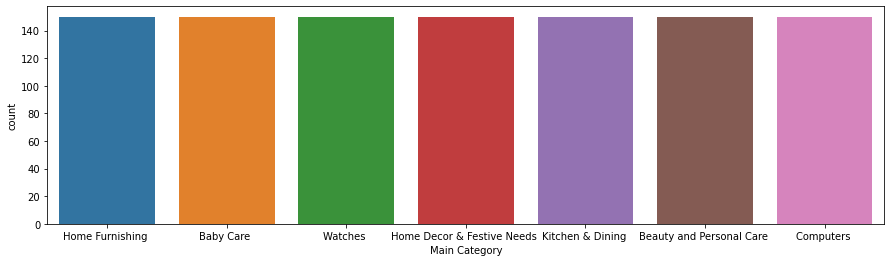

In [16]:
plt.figure(figsize=(15,4))
ax=sns.countplot(data=data, x="Main Category")

In [17]:
data['Main Category'].value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: Main Category, dtype: int64

### Sous-categories
Si on regarde la premiere sous categories on voit que la distribution des produits par categories est tres heterogene. En plus la plupart des sous categories ont un nombre assez faible de produits.

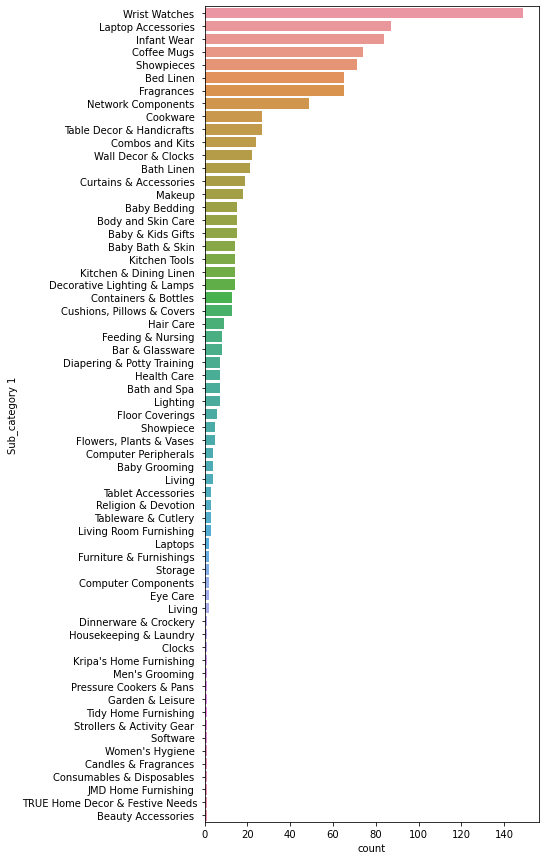

In [18]:
plt.figure(figsize=(6,15))
ax=sns.countplot(data=data, y="Sub_category 1", order=data["Sub_category 1"].value_counts().index)

In [19]:
data['Sub_category 1'].value_counts().head(10)

Wrist Watches                 149
Laptop Accessories             87
Infant Wear                    84
Coffee Mugs                    74
Showpieces                     71
Bed Linen                      65
Fragrances                     65
Network Components             49
Cookware                       27
Table Decor & Handicrafts      27
Name: Sub_category 1, dtype: int64

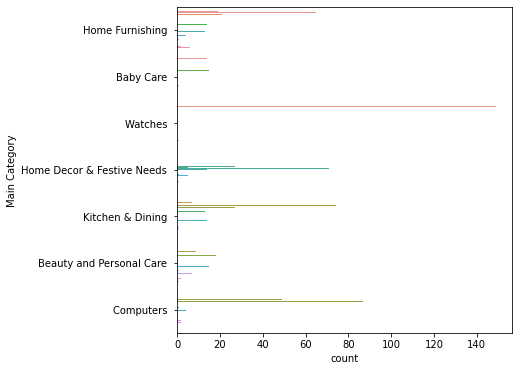

In [20]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data=data, y='Main Category', hue ="Sub_category 1")
plt.legend([],[], frameon=False)

In [21]:
categories=data['Main Category'].value_counts().index
categories

Index(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '],
      dtype='object')

In [22]:
sub_categ=data['Sub_category 1'].value_counts().index
print("Le nombre de sous categories est ",  len(sub_categ))

Le nombre de sous categories est  63


### Distribution des sous-category par categorie principale

In [23]:
subCat=data.groupby(['Main Category'])['Sub_category 1'].value_counts(normalize=True)
subCat.head(50)

Main Category                Sub_category 1                 
Baby Care                    Infant Wear                        0.560000
                             Baby & Kids Gifts                  0.100000
                             Baby Bedding                       0.100000
                             Baby Bath & Skin                   0.093333
                             Feeding & Nursing                  0.053333
                             Diapering & Potty Training         0.046667
                             Baby Grooming                      0.026667
                             Furniture & Furnishings            0.013333
                             Strollers & Activity Gear          0.006667
Beauty and Personal Care     Fragrances                         0.433333
                             Combos and Kits                    0.160000
                             Makeup                             0.120000
                             Body and Skin Care                

## Encoding Categories
Nous allons utiliser les categories principales dans notre etude, nous ferons l'encodage en utilisant LabelEncoder afin de pouvoir calculer les scores (ARI, silhouette..) lors de la classification.

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Main Category'])
data['target']=le.transform(data['Main Category'])

In [25]:
target=list(set(data['target']))

cat_labels=le.inverse_transform(target)

corresp=pd.DataFrame()
corresp['Category']=cat_labels
corresp['Target']=target
corresp

Category  Target
0                   Baby Care        0
1    Beauty and Personal Care        1
2                   Computers        2
3  Home Decor & Festive Needs        3
4             Home Furnishing        4
5            Kitchen & Dining        5
6                     Watches        6

## Les jeux de donnees text et image


### Preparation du texte

Pour avoir plus d'informations sur les produit on fait une concatenation du nom du produit et de sa description

In [26]:
data['Text']=data['product_name']+data['description']
data['Text'].sample(5)

964    FURNISHINGLAND Maroon Silk CarpetKey Features ...
309    Infinity India Antique Gemstone Brass Surahi H...
765    Nutcase Sticker Wrap Design - Teal & Pink Wate...
974    Jaycoknit Mediterranean Sea's Lucky Wooden Han...
591    Furnishing Zone Printed Back CushionKey Featur...
Name: Text, dtype: object

In [27]:
text_data=pd.DataFrame()
text_data['Text']=data['Text']
text_data['Category']=data['Main Category']
text_data['target']=data['target']
text_data.head()

Text          Category  target
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing        4
1  Sathiyas Cotton Bath TowelSpecifications of Sa...        Baby Care        0
2  Eurospa Cotton Terry Face Towel SetKey Feature...        Baby Care        0
3  SANTOSH ROYAL FASHION Cotton Printed King size...  Home Furnishing        4
4  Jaipur Print Cotton Floral King sized Double B...  Home Furnishing        4

In [28]:
text_data.to_csv('text_data.csv', index=False)

In [29]:
image_data=pd.DataFrame()
image_data['image']=data['image']
image_data['Category']=data['Main Category']
image_data['target']=data['target']
image_data.head()

image          Category  target
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing        4
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care        0
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care        0
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing        4
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing        4

In [30]:
image_data.to_csv('image_data.csv', index=False)

# Exploration du Corpus

## Longueur des textes

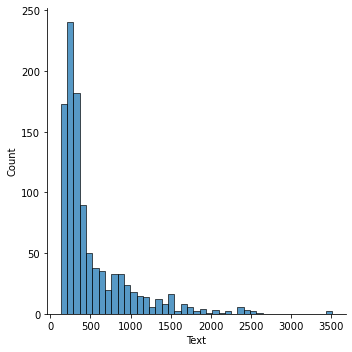

In [31]:
tmp=text_data['Text'].str.len()
sns.displot(tmp)

<AxesSubplot:xlabel='Text'>

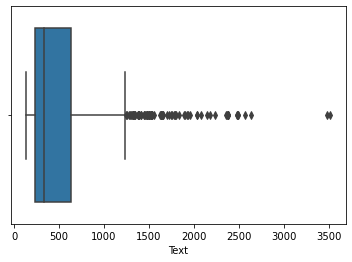

In [32]:
sns.boxplot(tmp)

In [33]:
tmp.describe()

count    1050.000000
mean      518.922857
std       461.283707
min       130.000000
25%       232.000000
50%       335.000000
75%       635.000000
max      3518.000000
Name: Text, dtype: float64

## Affichage de textes aleatoires par categorie

In [34]:
df_samp=text_data.sample(7)
for idx, df in df_samp.iterrows() :
    txt_1= f"Category : {df['Category']}\n"
    print(txt_1+df['Text']+"..."+"\n\n")

Category : Beauty and Personal Care 
Arabian Nights Evolve Combo SetFlipkart.com: Buy Arabian Nights Evolve Combo Set online only for Rs. 398 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


Category : Baby Care 
NeedyBee Baby Girl's Layered DressSpecifications of NeedyBee Baby Girl's Layered Dress In The Box 1 Dress Dimensions Length Mini/Short General Details Pattern Printed Occasion Casual Ideal For Baby Girl's Dress Details Sleeve Sleeveless Number of Contents in Sales Package Pack of 1 Fabric Net, Polyester Type Layered Neck Round Neck Fabric Care Machine Wash...


Category : Home Furnishing 
Aroma Comfort Polyester Brown Printed Eyelet Window CurtainKey Features of Aroma Comfort Polyester Brown Printed Eyelet Window Curtain Height: 182 cm Width: 121 cm,Specifications of Aroma Comfort Polyester Brown Printed Eyelet Window Curtain (182 cm in Height, Pack of 2) General Brand Aroma Comfort Designed For Window Type Eyelet Mo

## Netoyage du texte

In [35]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.corpus import words, stopwords
from nltk.tokenize import RegexpTokenizer
stop_words = set(stopwords.words('english'))

In [36]:
from string import punctuation
from nltk.corpus import stopwords
print('punctuations : ', punctuation)
print('_______________')
print()
stop_w = list(set(stopwords.words('english')))
print('stop words : ' ,  stop_w)

punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
_______________

stop words :  ['off', 'couldn', 'it', "she's", 'before', 'too', 'his', 'was', 'o', 'll', 'being', 'does', 'don', 'just', "should've", 'in', 'myself', 'through', 'very', 're', 'or', 'the', 'a', 'there', 'hadn', 'she', 'between', 'such', 'up', 'will', "that'll", "wouldn't", 'theirs', 'are', 'were', 'me', 'weren', 'should', "weren't", "hasn't", 'haven', 'nor', 'yours', "couldn't", 'shan', 'how', 'below', 'those', 'won', 'my', 'into', 'now', 'mustn', 'themselves', 'ours', 'them', "haven't", 't', "wasn't", 'and', 's', 'whom', 'of', 'm', 'more', 'these', 'few', 'having', 'so', "don't", 'by', "shouldn't", 'has', "you're", 'to', 'then', 'why', 'all', 'most', 'am', 'here', 'other', 'until', "you'd", 'down', "needn't", 'who', 'our', 'aren', 'didn', 'they', 'is', 'after', 'do', 'an', 'd', 'isn', "you've", 'have', 'doing', 'if', 've', 'yourself', "aren't", 'when', 'where', "doesn't", 'i', 'for', 'him', 'did', "won't", "hadn't", 'be'

In [37]:
def process_text_1(doc):
    # lower case and removes spaces before and after word
    doc=doc.lower().strip()
    # Regular expression tokenizer divides sentences into words
    tokenizer=RegexpTokenizer(r"\w+")
    raw_tokens=tokenizer.tokenize(doc)
    #Remove stopwords and punctuation and vords of length 1                       
    tokens=[w for w in raw_tokens if w not in stop_w]
    tokens=[w for w in tokens if w not in punctuation]
    tokens=[w for w in tokens if len(w) > 2]
    return tokens                      

In [38]:
text_data['tokenize_1'] = text_data['Text'].apply(lambda x: process_text_1(x))

In [39]:
text_data['length_Text'] = text_data['Text'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", text_data['length_Text'].max())

max length bow :  643


In [40]:
text_data['length_tokenize_1'] = text_data['tokenize_1'].apply(lambda x : len(x))
print("max length tokenized 1 : ", text_data['length_tokenize_1'].max())

max length tokenized 1 :  365


## Lemmatisation stemming et join

In [41]:
def lem_or_stem(list_words, case):
    if case=='lem':
        lemmatizer = WordNetLemmatizer()
        lem_w = [lemmatizer.lemmatize(w) for w in list_words]
        transf_desc_text = ' '.join(lem_w)
    else :
        stemmer=PorterStemmer()
        stem_w = [stemmer.stem(w) for w in list_words]
        transf_desc_text = ' '.join(stem_w)
    return transf_desc_text

        

def dl_fct(list_words):
    w = [w for w in list_words]
    transf_desc_text = ' '.join(w)
    return transf_desc_text
    

In [42]:
text_data['tokenize_1_lem'] = text_data['tokenize_1'].apply(lambda x: lem_or_stem(x, 'lem'))
text_data['tokenize_1_stem'] = text_data['tokenize_1'].apply(lambda x: lem_or_stem(x, 'stem'))

In [43]:
text_data['tokenize_1_dl'] = text_data['tokenize_1'].apply(lambda x: dl_fct(x))

In [44]:
text_data.head()

Text          Category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing    
1  Sathiyas Cotton Bath TowelSpecifications of Sa...        Baby Care    
2  Eurospa Cotton Terry Face Towel SetKey Feature...        Baby Care    
3  SANTOSH ROYAL FASHION Cotton Printed King size...  Home Furnishing    
4  Jaipur Print Cotton Floral King sized Double B...  Home Furnishing    

   target                                         tokenize_1  length_Text  \
0       4  [elegance, polyester, multicolor, abstract, ey...          253   
1       0  [sathiyas, cotton, bath, towelspecifications, ...           87   
2       0  [eurospa, cotton, terry, face, towel, setkey, ...          257   
3       4  [santosh, royal, fashion, cotton, printed, kin...          159   
4       4  [jaipur, print, cotton, floral, king, sized, d...          238   

   length_tokenize_1                                     tokenize_1_lem  \
0                158  elegance polyester multicolor abstract eyelet ...   
1                 65  sathiyas cotton bath towelspecifications sathi...   
2                159  eurospa cotton terry face towel setkey feature...   
3                120  santosh royal fashion cotton printed king size...   
4                157  jaipur print cotton floral king sized double b...   

                                     tokenize_1_stem  \
0  eleg polyest multicolor abstract eyelet door c...   
1  sathiya cotton bath towelspecif sathiya cotton...   
2  eurospa cotton terri face towel setkey featur ...   
3  santosh royal fashion cotton print king size d...   
4  jaipur print cotton floral king size doubl bed...   

                                       tokenize_1_dl  
0  elegance polyester multicolor abstract eyelet ...  
1  sathiyas cotton bath towelspecifications sathi...  
2  eurospa cotton terry face towel setkey feature...  
3  santosh royal fashion cotton printed king size...  
4  jaipur print cotton floral king sized double b...

### Distribution et frequences des mots dans le corpus

In [45]:
list_words = np.concatenate(text_data['tokenize_1'].to_list())
freq=pd.Series(list_words).value_counts(ascending=True)
freq.describe()

count    6194.000000
mean        9.872296
std        35.774176
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       633.000000
dtype: float64

In [46]:
len(list_words)

61149

<AxesSubplot:>

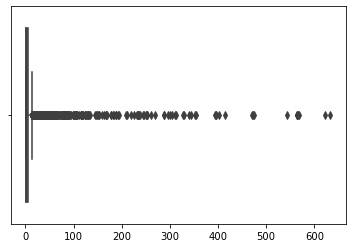

In [47]:
sns.boxplot(freq)

In [48]:
mots_rares=freq[freq<2]
mots_rares

adapterbuy    1
sahara        1
lsahara       1
specific      1
ndura         1
             ..
558           1
opened        1
sense         1
warrenty      1
scented       1
Length: 1885, dtype: int64

In [49]:
mots_frequents=freq[freq>500]
mots_frequents

day            543
genuine        564
shipping       564
cash           564
delivery       567
replacement    568
free           622
products       633
dtype: int64

In [50]:
mots_frequents=mots_frequents.index
mots_frequents

Index(['day', 'genuine', 'shipping', 'cash', 'delivery', 'replacement', 'free',
       'products'],
      dtype='object')

# Exploration des mots frequents par categorie

In [51]:
def exploreCat(i,tok):
    categories=text_data.groupby('target')[tok]
    cat=np.concatenate(categories.get_group(i).to_list())
    freq=pd.Series(cat).value_counts(ascending=False)
    return cat, freq

cat, freq=exploreCat(1, 'tokenize_1')
freq.head(10)


combo          186
com            159
products       128
set            123
free           111
replacement    105
delivery       103
day            101
cash           101
shipping       101
dtype: int64

### Representation graphique des mots frequents par categorie

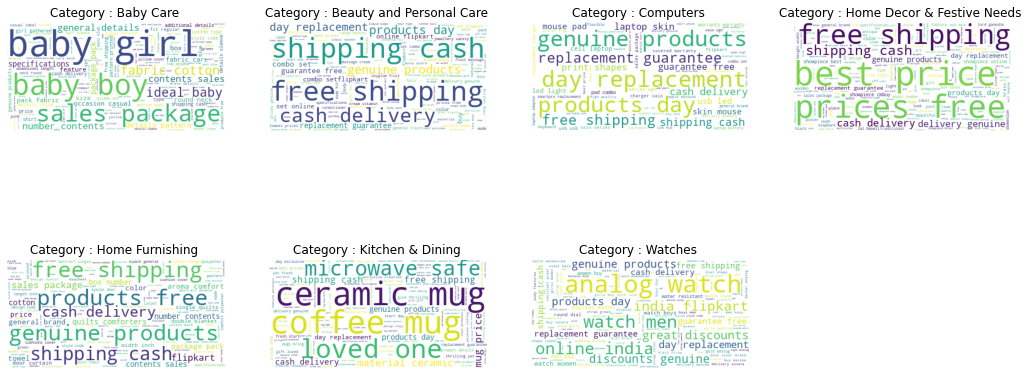

In [52]:
from wordcloud import WordCloud
fig = plt.figure(figsize=(18,8))
for i in range(len(target)):
    ax = fig.add_subplot(2,4,i+1)
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='steelblue')
    cat, freq=exploreCat(i, 'tokenize_1')
    wordcloud.generate(" ".join(cat))
    # Visualize the word cloud
#wordcloud.to_image()
    ax.imshow(wordcloud)
    ax.title.set_text("Category : " + cat_labels[i])
    ax.axis('off')
   

### Distribution des mots frequents par categorie

In [53]:
frequencies=pd.DataFrame()
top20freq=pd.DataFrame()
for i in range(len(target)):
    cat, freq=exploreCat(i, 'tokenize_1')
    frequencies[cat_labels[i]]=freq[freq.index.isin(mots_frequents)]
frequencies
    


Baby Care   Beauty and Personal Care   Computers   \
free                 46                        111         112   
products             39                        128          95   
genuine              34                        101          94   
shipping             34                        101          94   
cash                 34                        101          94   
delivery             34                        103          94   
day                  21                        101          96   
replacement          14                        105         185   

             Home Decor & Festive Needs   Home Furnishing   Kitchen & Dining   \
free                                  83                77                 59   
products                              92                77                 68   
genuine                               76                74                 51   
shipping                              76                74                 51   
cash                                  76                74                 51   
delivery                              77                74                 51   
day                                   81                 8                100   
replacement                           76                 3                 51   

             Watches   
free              134  
products          134  
genuine           134  
shipping          134  
cash              134  
delivery          134  
day               136  
replacement       134

<AxesSubplot:>

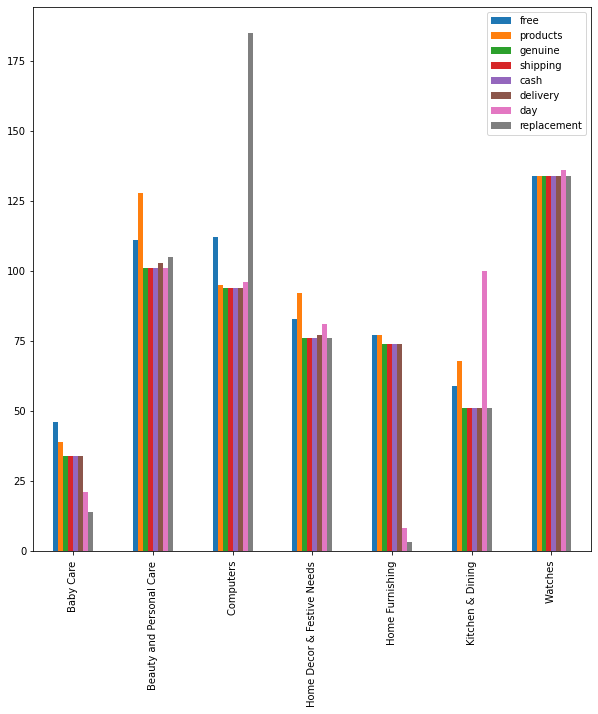

In [54]:
frequencies.transpose().plot(kind='bar', figsize=(10, 10))

## Enlever les mots frequents du corpus

In [55]:
def process_text_2(doc):
    # lower case and removes spaces before and after word
    doc=doc.lower().strip()
    # Regular expression tokenizer divides sentences into words
    tokenizer=RegexpTokenizer(r"\w+")
    raw_tokens=tokenizer.tokenize(doc)
                           
    tokens=[w for w in raw_tokens if w not in stop_w]
    tokens=[w for w in tokens if w not in punctuation]
    tokens=[w for w in tokens if len(w) > 2]
                                
    tokens=[w for w in tokens if w not in mots_frequents]
    return tokens         

In [56]:
text_data['tokenize_2'] = text_data['Text'].apply(lambda x: process_text_2(x))

In [57]:
list_words = np.concatenate(text_data['tokenize_2'].to_list())
freq=pd.Series(list_words).value_counts(ascending=True)
freq.describe()

count    6186.000000
mean        9.137407
std        29.361641
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       474.000000
dtype: float64

In [58]:
len(list_words)

56524

In [59]:
text_data['length_tokenize_2'] = text_data['tokenize_2'].apply(lambda x : len(x))
print("max length tokenized 2 : ", text_data['length_tokenize_2'].max())

max length tokenized 2 :  362


In [60]:
text_data['tokenize_2_lem'] = text_data['tokenize_2'].apply(lambda x: lem_or_stem(x,'lem'))
text_data['tokenize_2_stem'] = text_data['tokenize_2'].apply(lambda x: lem_or_stem(x,'stem'))
text_data['tokenize_2_dl'] = text_data['tokenize_2'].apply(lambda x: dl_fct(x))

In [61]:
text_data.head(2)

Text          Category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing    
1  Sathiyas Cotton Bath TowelSpecifications of Sa...        Baby Care    

   target                                         tokenize_1  length_Text  \
0       4  [elegance, polyester, multicolor, abstract, ey...          253   
1       0  [sathiyas, cotton, bath, towelspecifications, ...           87   

   length_tokenize_1                                     tokenize_1_lem  \
0                158  elegance polyester multicolor abstract eyelet ...   
1                 65  sathiyas cotton bath towelspecifications sathi...   

                                     tokenize_1_stem  \
0  eleg polyest multicolor abstract eyelet door c...   
1  sathiya cotton bath towelspecif sathiya cotton...   

                                       tokenize_1_dl  \
0  elegance polyester multicolor abstract eyelet ...   
1  sathiyas cotton bath towelspecifications sathi...   

                                          tokenize_2  length_tokenize_2  \
0  [elegance, polyester, multicolor, abstract, ey...                158   
1  [sathiyas, cotton, bath, towelspecifications, ...                 65   

                                      tokenize_2_lem  \
0  elegance polyester multicolor abstract eyelet ...   
1  sathiyas cotton bath towelspecifications sathi...   

                                     tokenize_2_stem  \
0  eleg polyest multicolor abstract eyelet door c...   
1  sathiya cotton bath towelspecif sathiya cotton...   

                                       tokenize_2_dl  
0  elegance polyester multicolor abstract eyelet ...  
1  sathiyas cotton bath towelspecifications sathi...

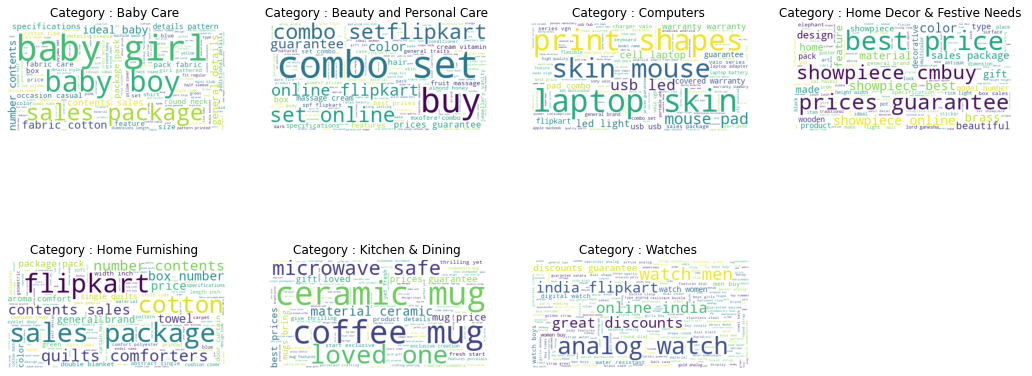

In [62]:
from wordcloud import WordCloud
fig = plt.figure(figsize=(18,8))
for i in range(len(target)):
    ax = fig.add_subplot(2,4,i+1)
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='steelblue')
    cat, freq=exploreCat(i, 'tokenize_2')
    wordcloud.generate(" ".join(cat))
    # Visualize the word cloud
#wordcloud.to_image()
    ax.imshow(wordcloud)
    ax.title.set_text("Category : " + cat_labels[i])
    ax.axis('off')
   

## Doublons

In [63]:
doublons = {}
for i in range(len(target)):
    for j in range(len(target)):
        if j > i:
            cat1, freq1 = exploreCat(i, 'tokenize_2')
            cat2, freq2 = exploreCat(j, 'tokenize_2')
            doublons[i, j] = [tok for tok in freq1.head(
                10).index if tok in freq2.head(10)]

In [64]:
doublons

{(0, 1): [],
 (0, 2): [],
 (0, 3): [],
 (0, 4): ['cotton'],
 (0, 5): [],
 (0, 6): [],
 (1, 2): ['guarantee', 'skin'],
 (1, 3): ['guarantee', 'online'],
 (1, 4): ['com', 'flipkart'],
 (1, 5): [],
 (1, 6): ['com', 'guarantee', 'flipkart', 'online', 'buy'],
 (2, 3): ['guarantee'],
 (2, 4): [],
 (2, 5): [],
 (2, 6): ['guarantee'],
 (3, 4): [],
 (3, 5): [],
 (3, 6): ['online', 'guarantee'],
 (4, 5): ['design'],
 (4, 6): ['flipkart', 'com'],
 (5, 6): []}

In [65]:
doublons=set(np.concatenate(list(doublons.values())))
doublons

{'buy', 'com', 'cotton', 'design', 'flipkart', 'guarantee', 'online', 'skin'}

In [66]:
doublefreq=pd.DataFrame()

In [67]:
for i in range(len(target)):
    cat, freq=exploreCat(i, 'tokenize_2')
    doublefreq[cat_labels[i]]=freq[freq.index.isin(doublons)]
doublefreq
    

Baby Care   Beauty and Personal Care   Computers   \
cotton            210                        NaN         NaN   
com                32                      159.0        68.0   
online             26                       83.0        26.0   
flipkart           25                       92.0        68.0   
design             21                        1.0        12.0   
guarantee          14                      101.0        96.0   
skin               14                       71.0        83.0   
buy                 8                       79.0         4.0   

           Home Decor & Festive Needs   Home Furnishing   Kitchen & Dining   \
cotton                             6.0             138.0                NaN   
com                                NaN              74.0                6.0   
online                            78.0               NaN               49.0   
flipkart                           2.0              74.0                6.0   
design                            31.0              83.0              102.0   
guarantee                         76.0               NaN               50.0   
skin                               NaN              10.0                NaN   
buy                                6.0               4.0                9.0   

           Watches   
cotton          NaN  
com           134.0  
online        134.0  
flipkart      134.0  
design          2.0  
guarantee     134.0  
skin            NaN  
buy           134.0

## Enlever les doublons du corpus

In [68]:
def process_text_3(doc):
    # lower case and removes spaces before and after word
    doc = doc.lower().strip()
    # Regular expression tokenizer divides sentences into words
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens = tokenizer.tokenize(doc)

    tokens = [w for w in raw_tokens if w not in stop_w]
    tokens = [w for w in tokens if w not in punctuation]
    tokens = [w for w in tokens if len(w) > 2]
    tokens = [w for w in tokens if w not in mots_frequents]
    tokens = [w for w in tokens if w not in doublons]
    return tokens

In [69]:
text_data['tokenize_3'] = text_data['Text'].apply(lambda x: process_text_3(x))

In [70]:
text_data['length_tokenize_3'] = text_data['tokenize_3'].apply(lambda x : len(x))
print("max length tokenized 3 : ", text_data['length_tokenize_3'].max())

max length tokenized 3 :  360


In [71]:
text_data['tokenize_3_lem'] = text_data['tokenize_3'].apply(lambda x: lem_or_stem(x, 'lem'))
text_data['tokenize_3_stem'] = text_data['tokenize_3'].apply(lambda x: lem_or_stem(x,'stem'))
text_data['tokenize_3_dl'] = text_data['tokenize_3'].apply(lambda x: dl_fct(x))

In [349]:
list_words = np.concatenate(text_data['tokenize_3'].to_list())
freq=pd.Series(list_words).value_counts(ascending=True)
freq.describe()

count    6178.000000
mean        8.701036
std        26.499568
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       474.000000
dtype: float64

In [350]:
len(list_words)

53755

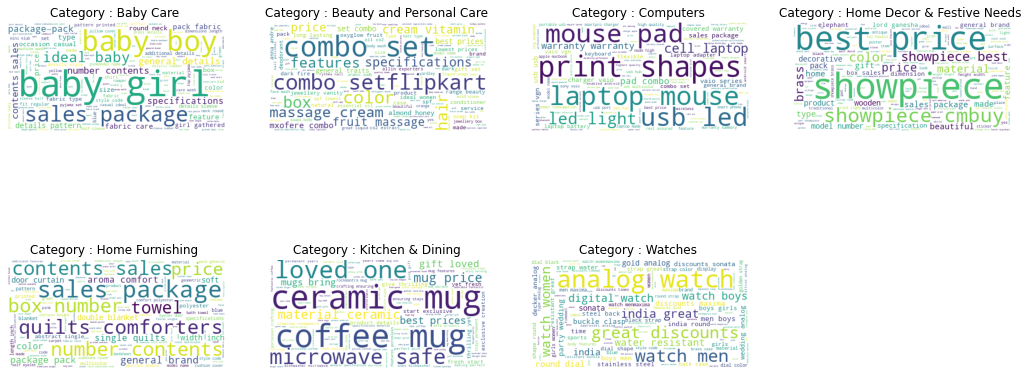

In [72]:
from wordcloud import WordCloud
fig = plt.figure(figsize=(18,8))
for i in range(len(target)):
    ax = fig.add_subplot(2,4,i+1)
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='steelblue')
    cat, freq=exploreCat(i, 'tokenize_3')
    wordcloud.generate(" ".join(cat))
    # Visualize the word cloud
#wordcloud.to_image()
    ax.imshow(wordcloud)
    ax.title.set_text("Category : " + cat_labels[i])
    ax.axis('off')

In [73]:
text_data.to_csv('description_tokenized.csv')

# Preparation commune des traitements

In [74]:
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


In [75]:
data_desc=pd.read_csv('description_tokenized.csv')

## Fonctions communes

In [76]:
y_cat_num=text_data['target'].values
l_cat=set(y_cat_num)
l_cat

{0, 1, 2, 3, 4, 5, 6}

In [77]:
labels=set(text_data['Category'])
labels

{'Baby Care ',
 'Beauty and Personal Care ',
 'Computers ',
 'Home Decor & Festive Needs ',
 'Home Furnishing ',
 'Kitchen & Dining ',
 'Watches '}

In [78]:
from sklearn.metrics import silhouette_score
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, perp,case) :
    time1 = time.time()
    num_labels= len(l_cat) ## how do i determine the number of labels
    if case == 'pca':
        print("Dimensions dataset avant réduction PCA : ", features.shape)
        pca = decomposition.PCA(n_components=0.99)
        feat_pca= pca.fit_transform(features)
        print("Dimensions dataset après réduction PCA : ", feat_pca.shape)
        tsne = manifold.TSNE(n_components=2, perplexity=perp, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
        X_tsne = tsne.fit_transform(feat_pca)
    else : 
        tsne = manifold.TSNE(n_components=2, perplexity=perp, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
        X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    sil=silhouette_score(X_tsne, cls.labels_) 
    print('Silhouette : ' , sil)
    print("ARI : ", ARI,  "time : ", time2)
   
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(18,8))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)


In [79]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

# Traitement de texte sur les trois corpus (avec stemming ou lematisation)
* Corpus 1 : Sans rien supprimer
* Copus 2 : Sans les mots frequents
* Corpus 3 : Dans les doublons


## 1- Bag of word - Tf-idf

In [322]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

###  Corpus 1 - Stemming

In [280]:
feat = 'tokenize_1_stem'
cv_fit = cvect.fit(text_data[feat])
ctf_fit = ctf.fit(text_data[feat])

cv_transform = cvect.transform(text_data[feat])  
ctf_transform = ctf.transform(text_data[feat])  

#### A- Bag of words

CountVectorizer : 
-----------------
Dimensions dataset avant réduction PCA :  (1050, 5133)
Dimensions dataset après réduction PCA :  (1050, 757)
Silhouette :  0.43968463
ARI :  0.439 time :  31.0


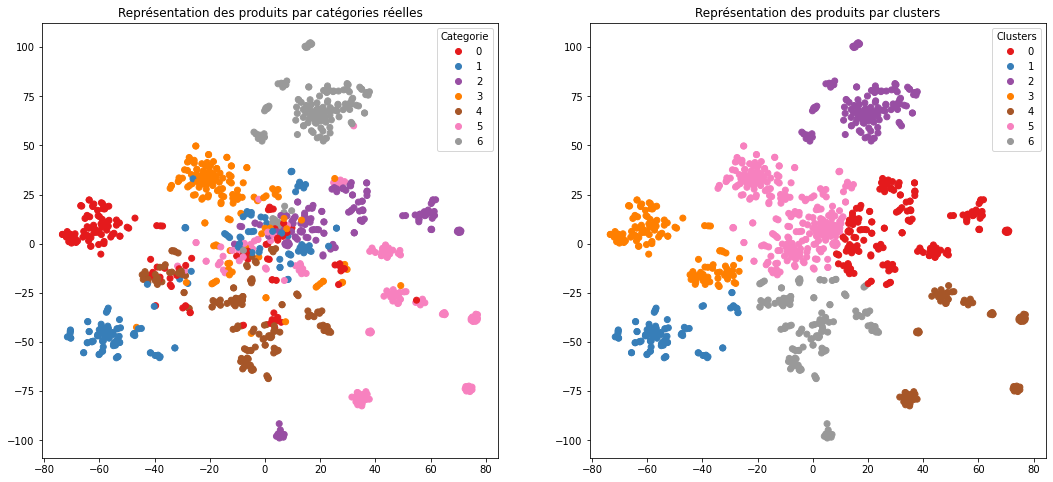

ARI :  0.439


In [287]:
print("CountVectorizer : ")
print("-----------------")
ARIC, X_tsneC, labelsC = ARI_fct(cv_transform.toarray(), 10, 'pca')
TSNE_visu_fct(X_tsneC, y_cat_num, labelsC, ARIC)

In [288]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsC)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [2 1 6 0 5 3 4]
[[103   5   8  21  12   1   0]
 [  4  80  18  46   2   0   0]
 [  0   0 107  31  12   0   0]
 [  1   1  10 127  10   1   0]
 [ 28   5   0   9 108   0   0]
 [  2   0  39  28   1  79   1]
 [  0   0   0  11   0   0 139]]

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       150
           1       0.88      0.53      0.66       150
           2       0.59      0.71      0.64       150
           3       0.47      0.85      0.60       150
           4       0.74      0.72      0.73       150
           5       0.98      0.53      0.68       150
           6       0.99      0.93      0.96       150

    accuracy                           0.71      1050
   macro avg       0.77      0.71      0.71      1050
weighted avg       0.77      0.71      0.71      1050



#### B- TF-IDF

Tf-idf : 
--------
Dimensions dataset avant réduction PCA :  (1050, 5133)
Dimensions dataset après réduction PCA :  (1050, 903)
Silhouette :  0.4836434
ARI :  0.573 time :  32.0


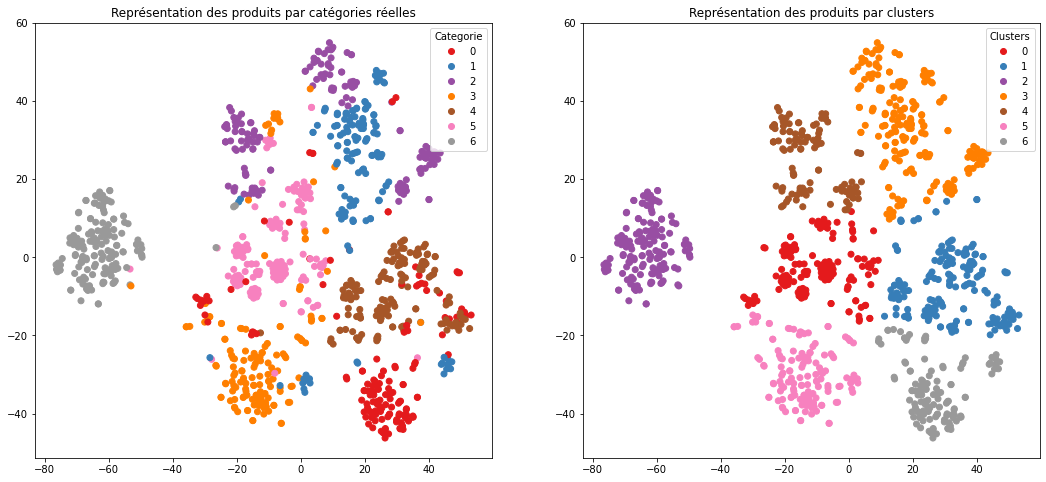

ARI :  0.573


In [292]:
print("Tf-idf : ")
print("--------")
ARIT, X_tsneT, labelsT = ARI_fct(ctf_transform.toarray(), 30,'pca')
TSNE_visu_fct(X_tsneT, y_cat_num, labelsT, ARIT)

In [294]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsT)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [5 4 6 1 2 3 0]
[[ 93   2   3   6  31  15   0]
 [ 12 116   2  11   9   0   0]
 [  0  86  61   0   3   0   0]
 [  0   2  12 119   1  15   1]
 [ 17   0   0   1 132   0   0]
 [  1   2  31   2   0 113   1]
 [  0   0   2   0   0   1 147]]

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       150
           1       0.56      0.77      0.65       150
           2       0.55      0.41      0.47       150
           3       0.86      0.79      0.82       150
           4       0.75      0.88      0.81       150
           5       0.78      0.75      0.77       150
           6       0.99      0.98      0.98       150

    accuracy                           0.74      1050
   macro avg       0.75      0.74      0.74      1050
weighted avg       0.75      0.74      0.74      1050



### Copus 1 - Lemmatisation

In [317]:
feat = 'tokenize_1_lem'
cv_fit = cvect.fit(text_data[feat])
ctf_fit = ctf.fit(text_data[feat])

cv_transform = cvect.transform(text_data[feat])  
ctf_transform = ctf.transform(text_data[feat])  

#### A- Bag of words

In [318]:
print("CountVectorizer : ")
print("-----------------")
ARIC, X_tsneC, labelsC = ARI_fct(cv_transform.toarray(), 55,'pca')
print()

CountVectorizer : 
-----------------
Dimensions dataset avant réduction PCA :  (1050, 5679)
Dimensions dataset après réduction PCA :  (1050, 763)
Silhouette :  0.40905887
ARI :  0.4466 time :  20.0



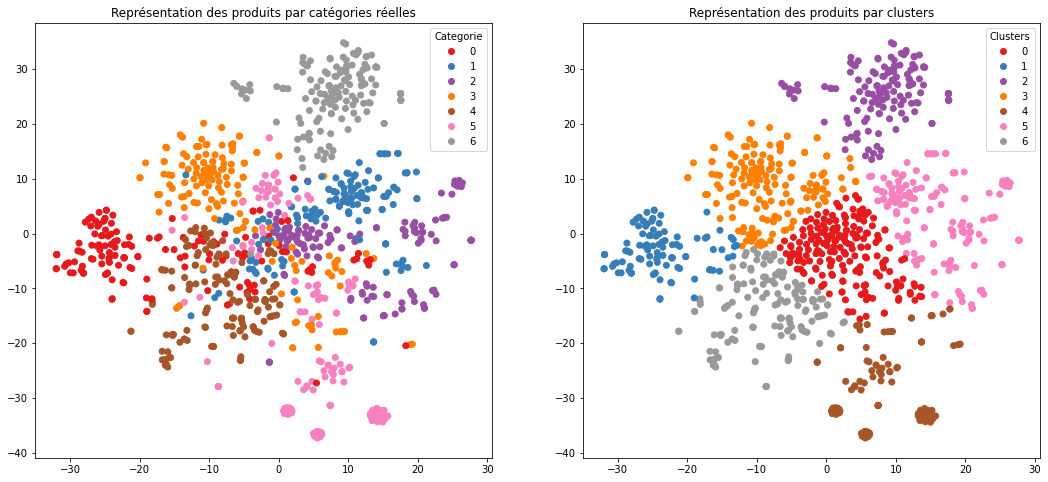

ARI :  0.4466


In [310]:
 TSNE_visu_fct(X_tsneC, y_cat_num, labelsC, ARIC)

In [311]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsC)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [2 0 6 3 5 1 4]
[[ 90   5  19  15  19   2   0]
 [  0  95  39   9   4   3   0]
 [  0  64  75   0   0  11   0]
 [  1   3  22 105   6  13   0]
 [  8   0   9  12 121   0   0]
 [  1   0  38  26  10  75   0]
 [  0   0   1   2   0   0 147]]

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       150
           1       0.57      0.63      0.60       150
           2       0.37      0.50      0.42       150
           3       0.62      0.70      0.66       150
           4       0.76      0.81      0.78       150
           5       0.72      0.50      0.59       150
           6       1.00      0.98      0.99       150

    accuracy                           0.67      1050
   macro avg       0.71      0.67      0.68      1050
weighted avg       0.71      0.67      0.68      1050



#### B- Tf - idf

In [316]:
print("Tf-idf : ")
print("--------")
ARIT, X_tsneT, labelsT = ARI_fct(ctf_transform.toarray(), 10,'pca')

Tf-idf : 
--------
Dimensions dataset avant réduction PCA :  (1050, 5679)
Dimensions dataset après réduction PCA :  (1050, 905)
Silhouette :  0.47615516
ARI :  0.5623 time :  16.0


#### Sans PCA

In [141]:
print("Tf-idf : ")
print("--------")
ARIT, X_tsneT, labelsT = ARI_fct(ctf_transform, 20,'none')

Tf-idf : 
--------
Silhouette :  0.5247083
ARI :  0.633 time :  21.0


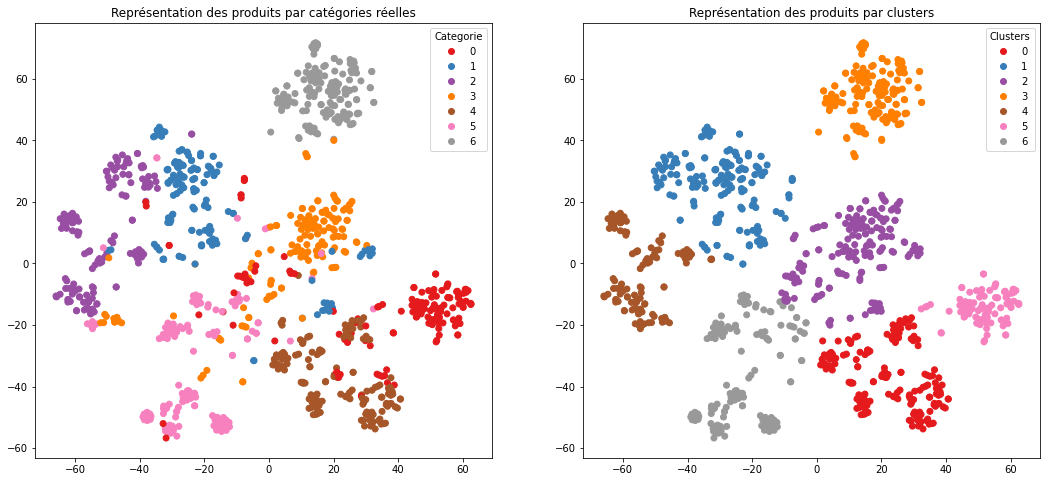

ARI :  0.633


In [142]:
TSNE_visu_fct(X_tsneT, y_cat_num, labelsT, ARIT)

In [143]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsT)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [4 1 3 6 2 0 5]
[[ 92  10   0  18  25   5   0]
 [  0 119   5  24   0   2   0]
 [  0  53  97   0   0   0   0]
 [  0   1  11 119   0  15   4]
 [  0   0   0   5 145   0   0]
 [  1   3   8  11   1 126   0]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.99      0.61      0.76       150
           1       0.64      0.79      0.71       150
           2       0.80      0.65      0.72       150
           3       0.67      0.79      0.73       150
           4       0.85      0.97      0.90       150
           5       0.85      0.84      0.85       150
           6       0.97      1.00      0.99       150

    accuracy                           0.81      1050
   macro avg       0.83      0.81      0.81      1050
weighted avg       0.83      0.81      0.81      1050



### Corpus 2 - Stemming

In [ ]:
feat = 'tokenize_2_stem'
cv_fit = cvect.fit(text_data[feat])
ctf_fit = ctf.fit(text_data[feat])

cv_transform = cvect.transform(text_data[feat])  
ctf_transform = ctf.transform(text_data[feat])  

#### A- Bag of words

In [360]:
print("CountVectorizer : ")
print("-----------------")
ARIC1, X_tsneC1, labelsC1 = ARI_fct(cv_transform.toarray(), 40,'pca')
print()

CountVectorizer : 
-----------------
Dimensions dataset avant réduction PCA :  (1050, 5673)
Dimensions dataset après réduction PCA :  (1050, 765)
Silhouette :  0.43850628
ARI :  0.4198 time :  56.0



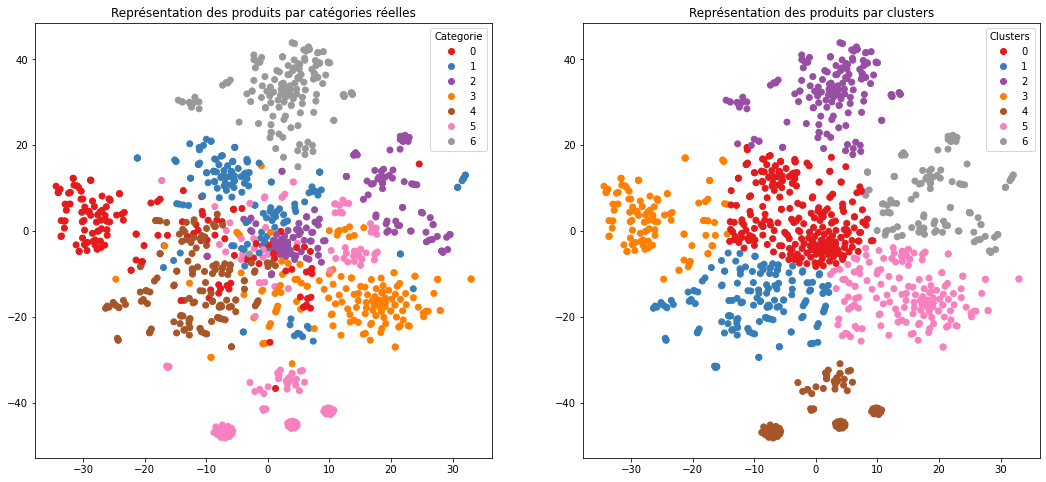

ARI :  0.4198


In [361]:
 TSNE_visu_fct(X_tsneC1, y_cat_num, labelsC1, ARIC1)

#### B-  TF-IDF (Meilleur model TF-IDF)

In [368]:
print("CountVectorizer : ")
print("-----------------")
ARIT1, X_tsneT1, labelsT1 = ARI_fct(ctf_transform.toarray(), 20,'pca')
print()

CountVectorizer : 
-----------------
Dimensions dataset avant réduction PCA :  (1050, 5673)
Dimensions dataset après réduction PCA :  (1050, 905)
Silhouette :  0.48435384
ARI :  0.6864 time :  38.0



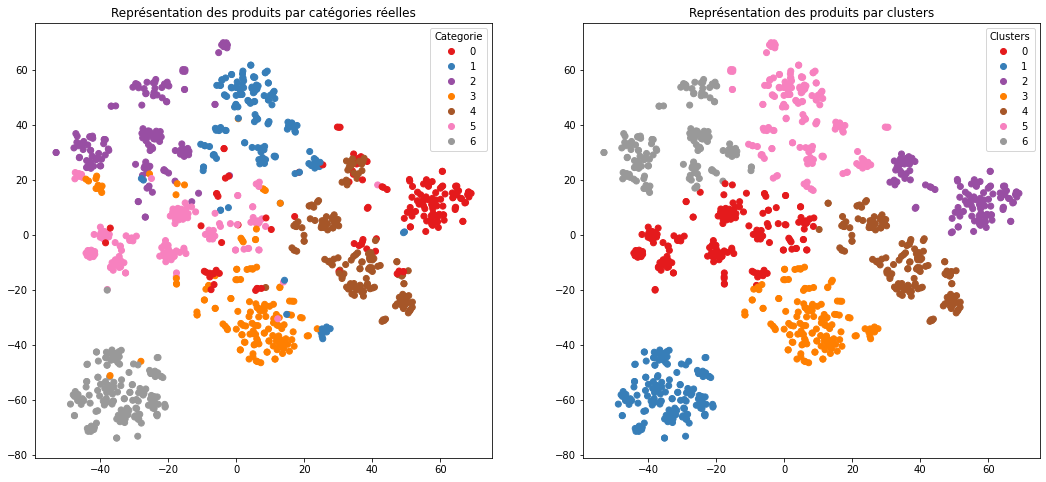

ARI :  0.6864


In [369]:
 TSNE_visu_fct(X_tsneT1, y_cat_num, labelsT1, ARIT1)

In [370]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsT1)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [5 6 0 3 4 1 2]
[[103   9   0   6  15  17   0]
 [  2 128   5  11   1   3   0]
 [  0  17 126   0   0   7   0]
 [  0   4  11 117   1  15   2]
 [ 19   0   0   1 130   0   0]
 [  1   3   8   2   0 136   0]
 [  0   0   0   0   0   1 149]]

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       150
           1       0.80      0.85      0.82       150
           2       0.84      0.84      0.84       150
           3       0.85      0.78      0.82       150
           4       0.88      0.87      0.88       150
           5       0.76      0.91      0.83       150
           6       0.99      0.99      0.99       150

    accuracy                           0.85      1050
   macro avg       0.85      0.85      0.85      1050
weighted avg       0.85      0.85      0.85      1050



In [372]:
A=ctf_transform.toarray()
print(A.shape)
TfIdf_freq_stem=pd.DataFrame(A)
pickle.dump(TfIdf_freq_stem,open('TfIdf_freq_stem', 'wb'))


(1050, 5673)


### Corpus 2 - Lemmatizing

In [351]:
feat = 'tokenize_2_lem'
cv_fit = cvect.fit(text_data[feat])
ctf_fit = ctf.fit(text_data[feat])

cv_transform = cvect.transform(text_data[feat])  
ctf_transform = ctf.transform(text_data[feat])  

#### A- Bag of words

In [92]:
print("CountVectorizer : ")
print("-----------------")
ARIC1, X_tsneC1, labelsC1 = ARI_fct(cv_transform, 50,'none')
print()

CountVectorizer : 
-----------------
Silhouette :  0.44255793
ARI :  0.4591 time :  42.0



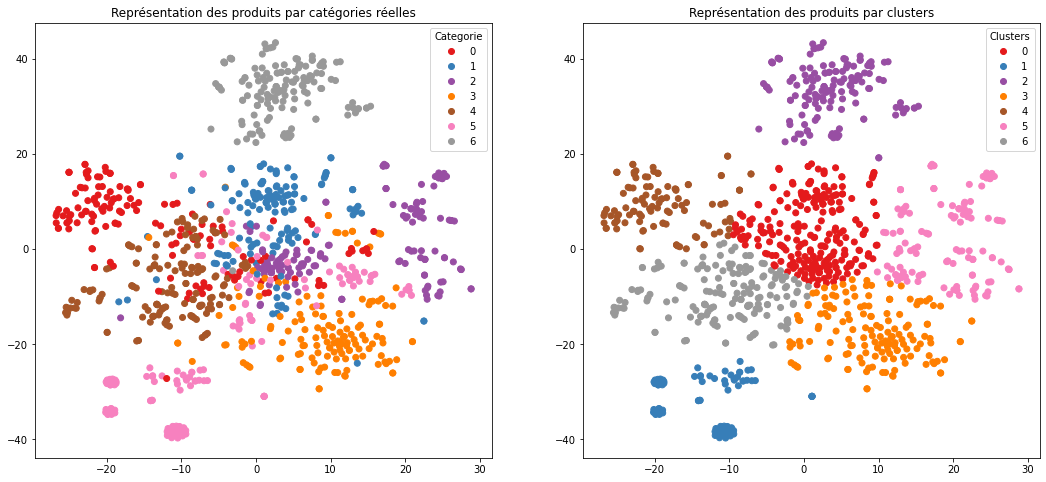

ARI :  0.4591


In [93]:
 TSNE_visu_fct(X_tsneC1, y_cat_num, labelsC1, ARIC1)

In [94]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsC1)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [1 5 6 3 0 2 4]
[[ 87  27   8   6  21   1   0]
 [  6 114  10  13   5   0   2]
 [  0  62  77   8   3   0   0]
 [  1  10  11 117  10   1   0]
 [ 12  21   0   0 117   0   0]
 [  4  14  27  11  15  79   0]
 [  0   0   0   0   1   0 149]]

              precision    recall  f1-score   support

           0       0.79      0.58      0.67       150
           1       0.46      0.76      0.57       150
           2       0.58      0.51      0.54       150
           3       0.75      0.78      0.77       150
           4       0.68      0.78      0.73       150
           5       0.98      0.53      0.68       150
           6       0.99      0.99      0.99       150

    accuracy                           0.70      1050
   macro avg       0.75      0.70      0.71      1050
weighted avg       0.75      0.70      0.71      1050



#### B-  TF - idf

In [97]:
print("Tf-idf : ")
print("--------")
ARIT1, X_tsneT1, labelsT1 = ARI_fct(ctf_transform, 35,'none')

Tf-idf : 
--------
Silhouette :  0.5044356
ARI :  0.5832 time :  19.0


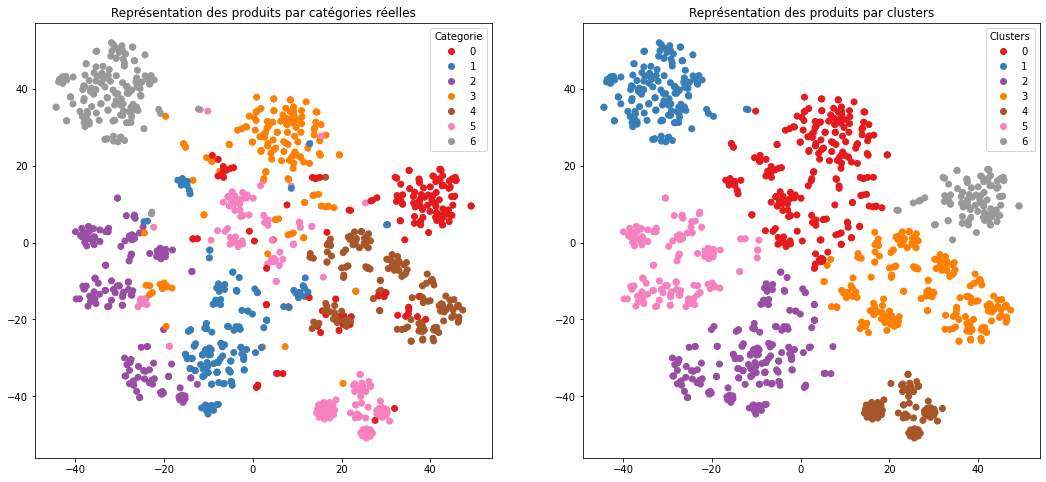

ARI :  0.5832


In [98]:
TSNE_visu_fct(X_tsneT1, y_cat_num, labelsT1, ARIT1)

In [99]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsT1)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [3 6 1 4 5 2 0]
[[ 92   7   3  19  27   2   0]
 [  2 119   5  11  13   0   0]
 [  0  49 101   0   0   0   0]
 [  0   3  11 133   1   1   1]
 [  0   0   0   1 149   0   0]
 [  1   2   9  59   5  73   1]
 [  0   0   2   0   0   0 148]]

              precision    recall  f1-score   support

           0       0.97      0.61      0.75       150
           1       0.66      0.79      0.72       150
           2       0.77      0.67      0.72       150
           3       0.60      0.89      0.71       150
           4       0.76      0.99      0.86       150
           5       0.96      0.49      0.65       150
           6       0.99      0.99      0.99       150

    accuracy                           0.78      1050
   macro avg       0.82      0.78      0.77      1050
weighted avg       0.82      0.78      0.77      1050



### Corpus 3 - Stemming


In [373]:
feat = 'tokenize_3_stem'
cv_fit = cvect.fit(text_data[feat])
ctf_fit = ctf.fit(text_data[feat])

cv_transform = cvect.transform(text_data[feat])  
ctf_transform = ctf.transform(text_data[feat])  

#### A- Bag of words

In [378]:
print("CountVectorizer : ")
print("-----------------")
ARIC2, X_tsneC2, labelsC2 = ARI_fct(cv_transform.toarray(), 35,'pca')
print()

CountVectorizer : 
-----------------
Dimensions dataset avant réduction PCA :  (1050, 5124)
Dimensions dataset après réduction PCA :  (1050, 763)
Silhouette :  0.4318036
ARI :  0.4031 time :  50.0



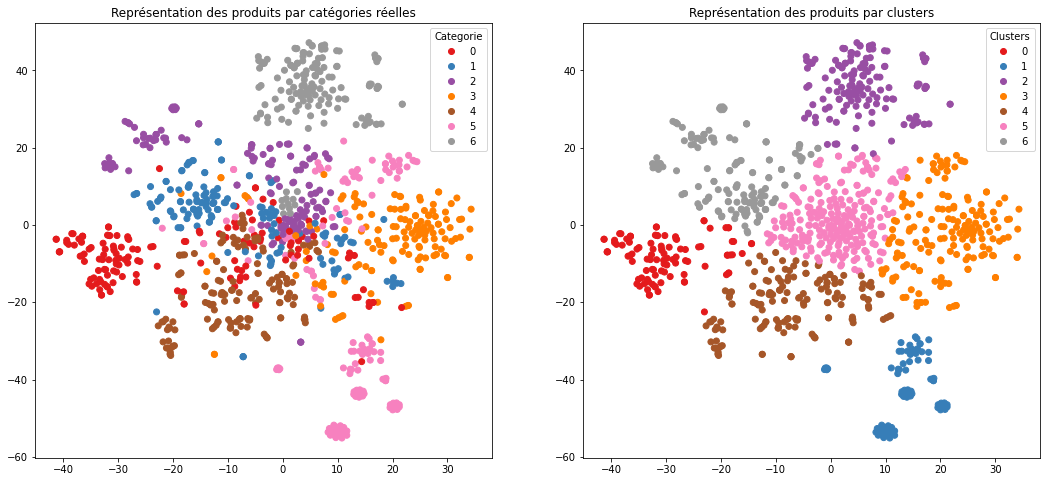

ARI :  0.4031


In [379]:
TSNE_visu_fct(X_tsneC2, y_cat_num, labelsC2, ARIC2)

In [380]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsC2)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [0 5 6 3 4 2 1]
[[ 83   3  36  12  15   1   0]
 [  6  83  35  19   7   0   0]
 [  0  58  82   0   3   0   7]
 [  0   3  14 116  16   1   0]
 [  8   0  31   0 111   0   0]
 [  3   2  32  27   6  79   1]
 [  0   0  11   0   0   0 139]]

              precision    recall  f1-score   support

           0       0.83      0.55      0.66       150
           1       0.56      0.55      0.56       150
           2       0.34      0.55      0.42       150
           3       0.67      0.77      0.72       150
           4       0.70      0.74      0.72       150
           5       0.98      0.53      0.68       150
           6       0.95      0.93      0.94       150

    accuracy                           0.66      1050
   macro avg       0.72      0.66      0.67      1050
weighted avg       0.72      0.66      0.67      1050



#### B- TF-IDF

In [324]:
print("Tf-idf : ")
print("--------")
ARIT2, X_tsneT2, labelsT2 = ARI_fct(ctf_transform.toarray(), 25,'pca')

Tf-idf : 
--------
Dimensions dataset avant réduction PCA :  (1050, 5124)
Dimensions dataset après réduction PCA :  (1050, 904)
Silhouette :  0.49181235
ARI :  0.6712 time :  35.0


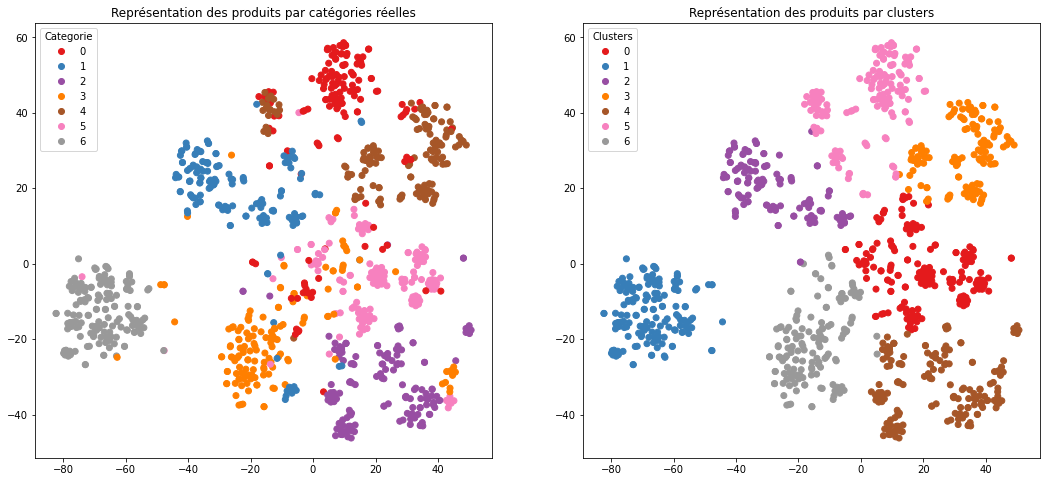

ARI :  0.6712


In [325]:
TSNE_visu_fct(X_tsneT2, y_cat_num, labelsT2, ARIT2)

In [326]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsT2)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [5 6 1 4 2 0 3]
[[108   4   1  15  12  10   0]
 [ 19 114   2  14   0   1   0]
 [  0   0 143   4   0   3   0]
 [  0   2  11 110   0  22   5]
 [ 23   1   0   1 119   6   0]
 [  1   0   9   4   0 134   2]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       150
           1       0.94      0.76      0.84       150
           2       0.86      0.95      0.91       150
           3       0.74      0.73      0.74       150
           4       0.91      0.79      0.85       150
           5       0.76      0.89      0.82       150
           6       0.96      1.00      0.98       150

    accuracy                           0.84      1050
   macro avg       0.84      0.84      0.84      1050
weighted avg       0.84      0.84      0.84      1050



In [327]:
A=ctf_transform.toarray()
print(A.shape)
TfIdf_dbl_stem=pd.DataFrame(A)
pickle.dump(TfIdf_dbl_stem,open('TfIdf_dbl_stem', 'wb'))


(1050, 5124)


### Corpus 3 - Lemmatizing

In [327]:
feat = 'tokenize_3_lem'
cv_fit = cvect.fit(text_data[feat])
ctf_fit = ctf.fit(text_data[feat])

cv_transform = cvect.transform(text_data[feat])  
ctf_transform = ctf.transform(text_data[feat])  

#### A- Bag of words

In [104]:
print("CountVectorizer : ")
print("-----------------")
ARIC2, X_tsneC2, labelsC2 = ARI_fct(cv_transform, 35,'none')
print()

CountVectorizer : 
-----------------
Silhouette :  0.4417608
ARI :  0.4282 time :  26.0



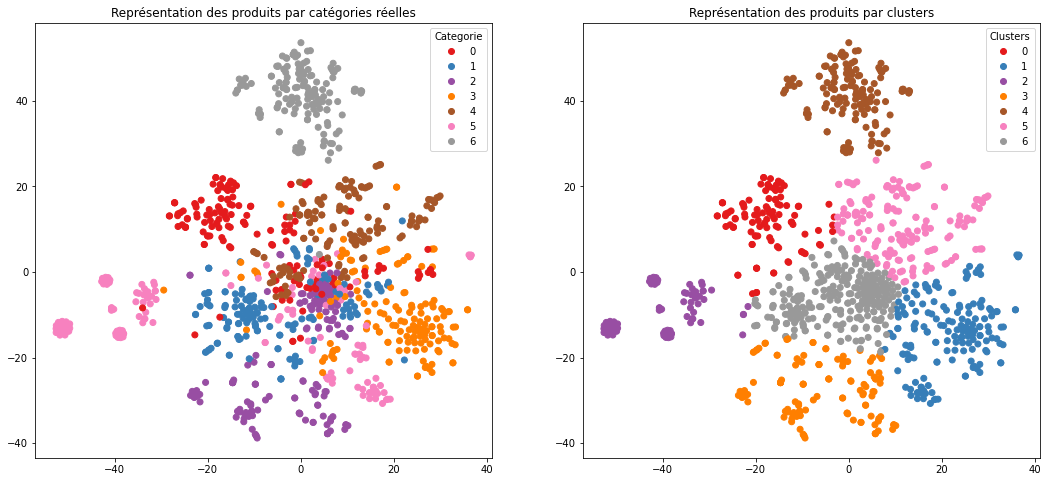

ARI :  0.4282


In [105]:
TSNE_visu_fct(X_tsneC2, y_cat_num, labelsC2, ARIC2)

In [106]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsC2)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [0 3 5 2 6 4 1]
[[ 87  35   0   7  19   2   0]
 [  7  95  25  17   3   3   0]
 [  2  59  84   5   0   0   0]
 [  2  14   5 102  26   1   0]
 [  4  23   0   0 123   0   0]
 [  2  24  10  38   2  74   0]
 [  0   0   0   0   2   0 148]]

              precision    recall  f1-score   support

           0       0.84      0.58      0.69       150
           1       0.38      0.63      0.48       150
           2       0.68      0.56      0.61       150
           3       0.60      0.68      0.64       150
           4       0.70      0.82      0.76       150
           5       0.93      0.49      0.64       150
           6       1.00      0.99      0.99       150

    accuracy                           0.68      1050
   macro avg       0.73      0.68      0.69      1050
weighted avg       0.73      0.68      0.69      1050



### TF-Idf

In [331]:
print("Tf-idf : ")
print("--------")
ARIT2, X_tsneT2, labelsT2 = ARI_fct(ctf_transform.toarray(), 25,'pca')

Tf-idf : 
--------
Dimensions dataset avant réduction PCA :  (1050, 5667)
Dimensions dataset après réduction PCA :  (1050, 906)
Silhouette :  0.49391043
ARI :  0.6587 time :  16.0


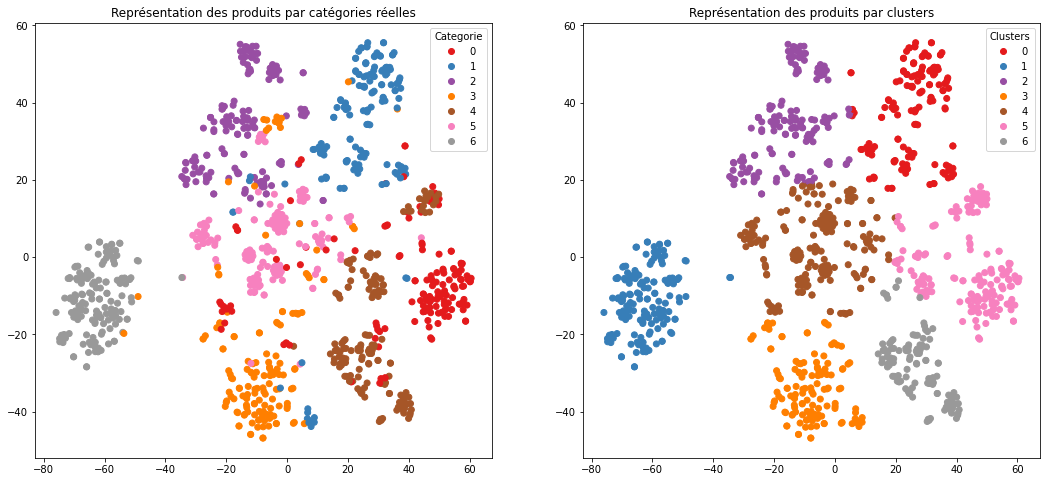

ARI :  0.6587


In [332]:
TSNE_visu_fct(X_tsneT2, y_cat_num, labelsT2, ARIT2)

In [333]:
cls_labels_transform = conf_mat_transform(y_cat_num, labelsT2)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [1 6 2 3 5 0 4]
[[108   4   2   6  12  18   0]
 [  2 131   2  11   0   4   0]
 [  0   6 130   0   0  14   0]
 [  3   2  11 112   0  20   2]
 [ 51   0   0   1  98   0   0]
 [  3   0   7   2   0 137   1]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       150
           1       0.92      0.87      0.89       150
           2       0.86      0.87      0.86       150
           3       0.85      0.75      0.79       150
           4       0.89      0.65      0.75       150
           5       0.71      0.91      0.80       150
           6       0.98      1.00      0.99       150

    accuracy                           0.82      1050
   macro avg       0.84      0.82      0.82      1050
weighted avg       0.84      0.82      0.82      1050



In [334]:
A=ctf_transform.toarray()
print(A.shape)
TfIdf_dbl=pd.DataFrame(A)
TfIdf_dbl.to_csv('TF-idf_features_dbl_lem.csv', index=False)

(1050, 5667)


# LDA analysis

In [81]:
import gensim
sentences1_lem = text_data['tokenize_1_lem'].to_list()
sentences1_lem = [gensim.utils.simple_preprocess(text) for text in sentences1_lem] 
sentences2_lem = text_data['tokenize_2_lem'].to_list()
sentences2_lem = [gensim.utils.simple_preprocess(text) for text in sentences2_lem]
sentences3_lem = text_data['tokenize_3_lem'].to_list()
sentences3_lem = [gensim.utils.simple_preprocess(text) for text in sentences3_lem]
sentences1_stem = text_data['tokenize_1_stem'].to_list()
sentences1_stem = [gensim.utils.simple_preprocess(text) for text in sentences1_stem] 
sentences2_stem = text_data['tokenize_2_stem'].to_list()
sentences2_stem = [gensim.utils.simple_preprocess(text) for text in sentences2_stem]
sentences3_stem = text_data['tokenize_3_stem'].to_list()
sentences3_stem = [gensim.utils.simple_preprocess(text) for text in sentences3_stem]


In [339]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(sentences3_stem)
# Create Corpus
texts = sentences3_stem
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
#word index in the dictionary and their frequency in the corpus

[(0, 5), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 11), (20, 1), (21, 2), (22, 1), (23, 6), (24, 2), (25, 1), (26, 7), (27, 1), (28, 1), (29, 1)]


In [340]:
from pprint import pprint
# number of topics
num_topics = 7
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100)
# Print the Keyword in the 10 topics
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [341]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds', R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.037248 -0.022788       1        1  23.542473
3     -0.013513 -0.104614       2        1  19.823474
0     -0.121880 -0.021036       3        1  14.447787
6     -0.037501  0.079436       4        1  14.140227
1      0.068284 -0.051484       5        1  11.695894
2      0.108236  0.020607       6        1   9.624274
5      0.033621  0.099878       7        1   6.725871, topic_info=        Term        Freq       Total Category  logprob  loglift
495    combo  207.000000  207.000000  Default  30.0000  30.0000
200   analog  357.000000  357.000000  Default  29.0000  29.0000
207    watch  462.000000  462.000000  Default  28.0000  28.0000
108      men  184.000000  184.000000  Default  27.0000  27.0000
713      usb  221.000000  221.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
61    number   12.354603  233.740186   Topic7  -5.6435  -0.2410
200   analog   12.830395  357.684269   Topic7  -5.6057  -0.6286
204    india   11.899183  175.384764   Topic7  -5.6811   0.0087
637   detail   12.116066  223.196426   Topic7  -5.6630  -0.2143
146  product   12.082088  224.231791   Topic7  -5.6658  -0.2217

[597 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.462257  abstract
0         2  0.109482  abstract
0         3  0.024329  abstract
0         4  0.206799  abstract
0         5  0.060823  abstract
...     ...       ...       ...
2717      1  0.074087        ym
2717      2  0.703828        ym
2717      3  0.148174        ym
2717      7  0.074087        ym
2149      7  0.820103      york

[1450 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 7, 2, 3, 6])

## 2- Word2Vec

In [82]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [83]:
w2v_size=300
w2v_window=5 #contxt window for the set of words to look on together
w2v_min_count=1 #use sentences with at least min_count words
w2v_epochs=100
maxlen = 370 # adapt to length of sentences


In [138]:
# Création et entraînement du modèle Word2Vec
feat = sentences3_lem
print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1) #CPU cores
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(feat) #building unique set of words
w2v_model.train(feat, total_examples=w2v_model.corpus_count, epochs=w2v_epochs) 
model_vectors = w2v_model.wv #word vector
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4945
Word2Vec trained


In [139]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(feat)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(feat),
                                                     maxlen=maxlen,
                                                     padding='post') #it generated a word_index
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4946


### Création de la matrice d'embedding

In [140]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4946, 300)


### Création du modèle d'embedding

In [141]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 390)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 390, 300)          1483800   
                                                                 
 global_average_pooling1d_4   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,483,800
Trainable params: 1,483,800
Non-trainable params: 0
_________________________________________________________________


### Exécution du modèle

In [142]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 6ms/step


(1050, 300)

### Corpus 1 - Stemming


Dimensions dataset avant réduction PCA :  (1050, 300)
Dimensions dataset après réduction PCA :  (1050, 55)
Silhouette :  0.50619465
ARI :  0.4542 time :  47.0


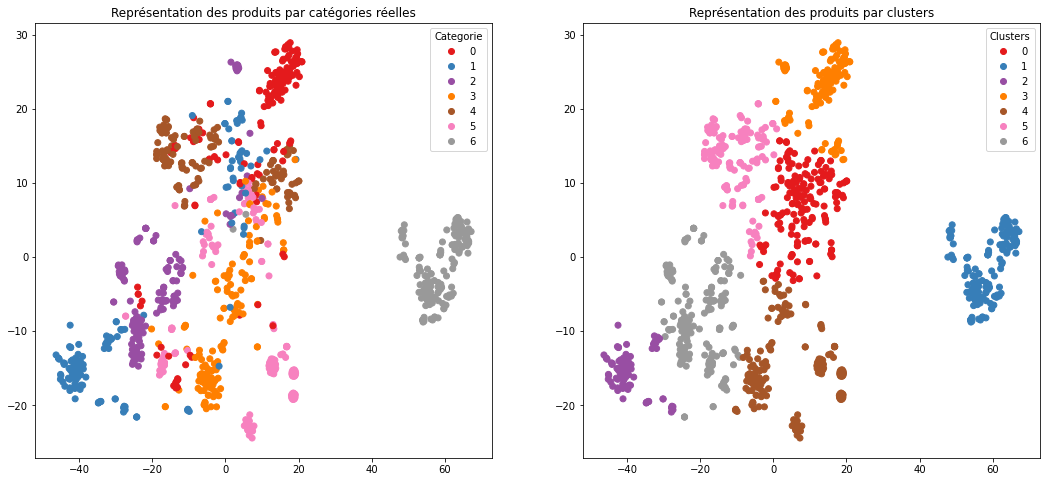

ARI :  0.4542


In [94]:
ARI, X_tsne, labels = ARI_fct(embeddings, 40,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [95]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [3 6 1 0 3 4 2]
[[ 89   0  19  18  24   0   0]
 [ 10  90  11  33   6   0   0]
 [ 12   0 127  10   1   0   0]
 [  1   0  12 136   1   0   0]
 [  6   0   0  42 102   0   0]
 [  0   0  30 104  16   0   0]
 [  0   0   0   2   0   0 148]]

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       150
           1       1.00      0.60      0.75       150
           2       0.64      0.85      0.73       150
           3       0.39      0.91      0.55       150
           4       0.68      0.68      0.68       150
           5       0.00      0.00      0.00       150
           6       1.00      0.99      0.99       150

    accuracy                           0.66      1050
   macro avg       0.64      0.66      0.62      1050
weighted avg       0.64      0.66      0.62      1050



### Corpus 2  - Stemming

Dimensions dataset avant réduction PCA :  (1050, 300)
Dimensions dataset après réduction PCA :  (1050, 55)
Silhouette :  0.51500833
ARI :  0.503 time :  31.0


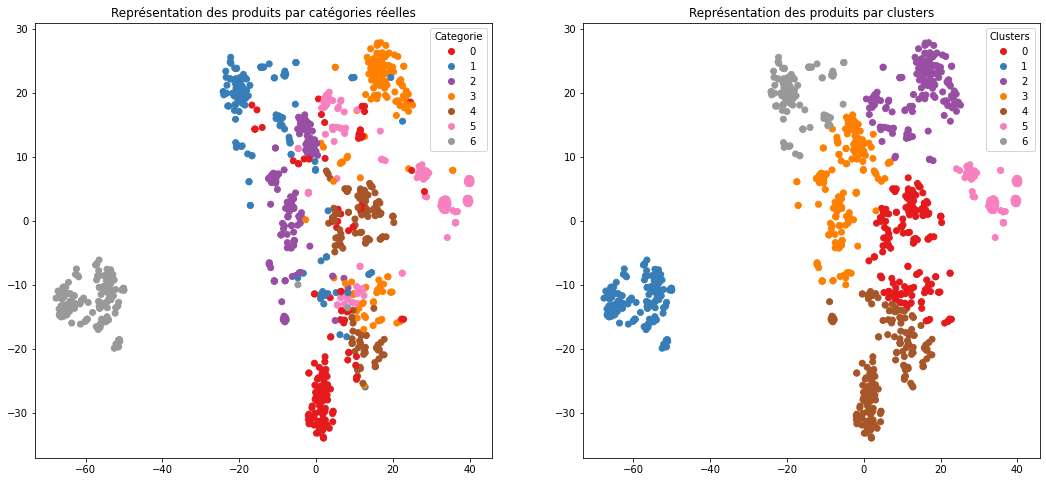

ARI :  0.503


In [104]:
ARI, X_tsne, labels = ARI_fct(embeddings, 40,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [105]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [4 6 3 2 0 5 1]
[[101   6   6  15  20   2   0]
 [ 11 106  17   6  10   0   0]
 [ 12   0 135   0   3   0   0]
 [  7   0   9  99  32   3   0]
 [ 47   0   4   0  99   0   0]
 [  3   0  10  43  19  75   0]
 [  1   0   1   0   0   0 148]]

              precision    recall  f1-score   support

           0       0.55      0.67      0.61       150
           1       0.95      0.71      0.81       150
           2       0.74      0.90      0.81       150
           3       0.61      0.66      0.63       150
           4       0.54      0.66      0.59       150
           5       0.94      0.50      0.65       150
           6       1.00      0.99      0.99       150

    accuracy                           0.73      1050
   macro avg       0.76      0.73      0.73      1050
weighted avg       0.76      0.73      0.73      1050



### Corpus 3 - Stemming 

Dimensions dataset avant réduction PCA :  (1050, 300)
Dimensions dataset après réduction PCA :  (1050, 54)
Silhouette :  0.51929766
ARI :  0.5665 time :  17.0


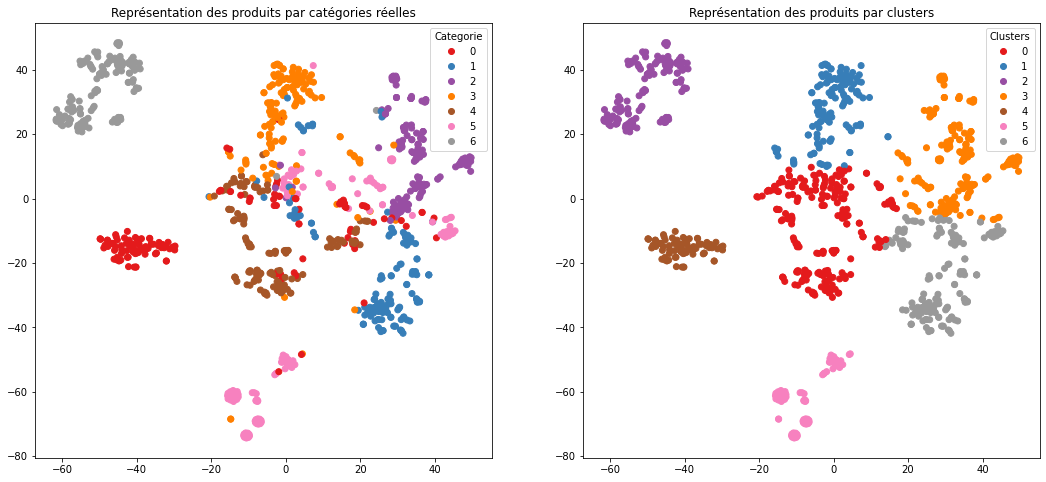

ARI :  0.5665


In [122]:
ARI, X_tsne, labels = ARI_fct(embeddings, 20,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [123]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [4 3 6 2 0 5 1]
[[ 84  17   6   3  38   2   0]
 [  0 118   3   9  20   0   0]
 [  0   2 144   1   3   0   0]
 [  0   3  10 121  13   3   0]
 [  0  17   0   1 132   0   0]
 [  0  18  27   4  27  74   0]
 [  0   0   1   0   1   0 148]]

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       150
           1       0.67      0.79      0.73       150
           2       0.75      0.96      0.84       150
           3       0.87      0.81      0.84       150
           4       0.56      0.88      0.69       150
           5       0.94      0.49      0.65       150
           6       1.00      0.99      0.99       150

    accuracy                           0.78      1050
   macro avg       0.83      0.78      0.78      1050
weighted avg       0.83      0.78      0.78      1050



### Corpus 1 - Lemmatization

Silhouette :  0.52406776
ARI :  0.413 time :  70.0


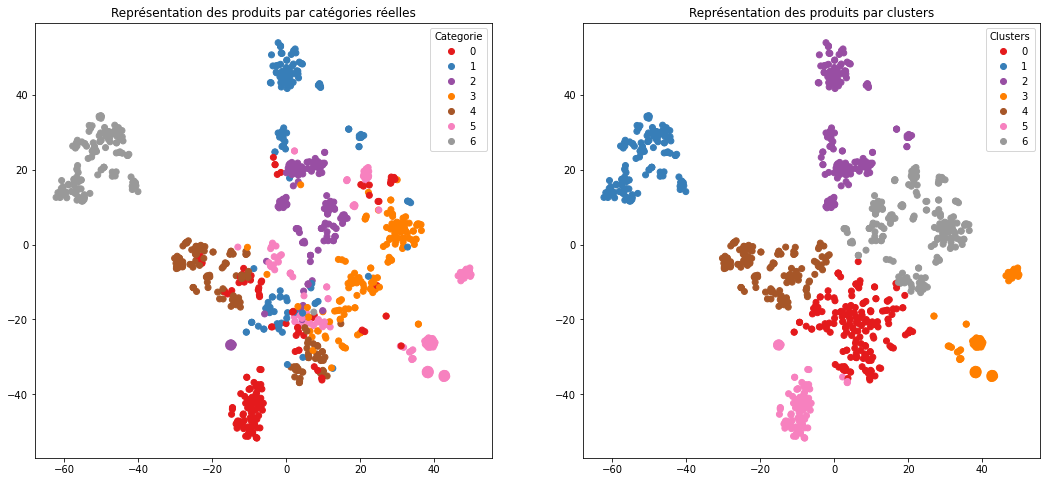

ARI :  0.413


In [175]:
ARI, X_tsne, labels = ARI_fct(embeddings, 25,'none')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [176]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [4 6 1 5 4 0 3]
[[ 81   5   0  15  47   2   0]
 [  0 101   0   6  43   0   0]
 [ 10  69   0  58  13   0   0]
 [  0   1   0 104  42   3   0]
 [  4   0   0   0 146   0   0]
 [  0   2   0  28  46  74   0]
 [  0   0   0   0   1   0 149]]

              precision    recall  f1-score   support

           0       0.85      0.54      0.66       150
           1       0.57      0.67      0.62       150
           2       0.00      0.00      0.00       150
           3       0.49      0.69      0.58       150
           4       0.43      0.97      0.60       150
           5       0.94      0.49      0.65       150
           6       1.00      0.99      1.00       150

    accuracy                           0.62      1050
   macro avg       0.61      0.62      0.58      1050
weighted avg       0.61      0.62      0.58      1050



### Corpus 2 - Lemmatization

Dimensions dataset avant réduction PCA :  (1050, 300)
Dimensions dataset après réduction PCA :  (1050, 52)
Silhouette :  0.54354763
ARI :  0.5638 time :  22.0


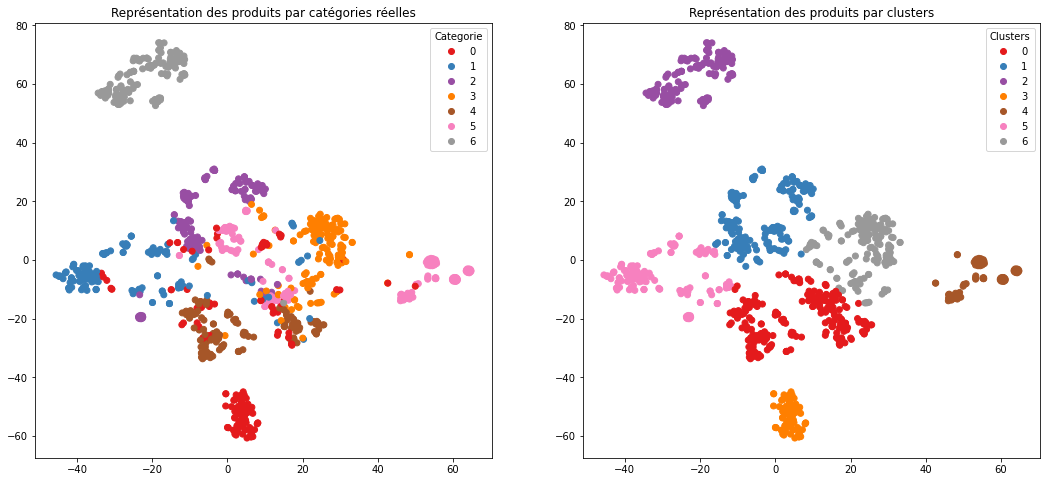

ARI :  0.5638


In [136]:
ARI, X_tsne, labels = ARI_fct(embeddings, 25,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [137]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [4 2 6 0 5 1 3]
[[ 80   8   9  14  37   2   0]
 [  0 125   6   9  10   0   0]
 [  0  11 124   0  15   0   0]
 [  0   0  10 122  15   3   0]
 [  0   0   4   1 145   0   0]
 [  0   0  44  13  19  74   0]
 [  0   0   0   0   1   0 149]]

              precision    recall  f1-score   support

           0       1.00      0.53      0.70       150
           1       0.87      0.83      0.85       150
           2       0.63      0.83      0.71       150
           3       0.77      0.81      0.79       150
           4       0.60      0.97      0.74       150
           5       0.94      0.49      0.65       150
           6       1.00      0.99      1.00       150

    accuracy                           0.78      1050
   macro avg       0.83      0.78      0.78      1050
weighted avg       0.83      0.78      0.78      1050



### Corpus 3 - Lemmatization (Meilleur model Word2Vec)

Dimensions dataset avant réduction PCA :  (1050, 300)
Dimensions dataset après réduction PCA :  (1050, 51)
Silhouette :  0.53171396
ARI :  0.5784 time :  24.0


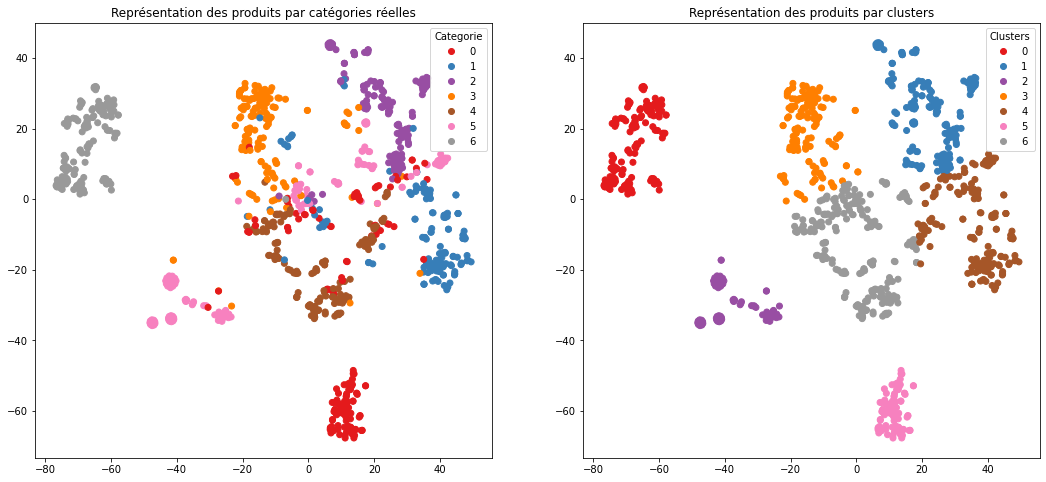

ARI :  0.5784


In [147]:
ARI, X_tsne, labels = ARI_fct(embeddings, 20,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [148]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [6 2 5 3 1 0 4]
[[ 84  22   2   3  37   2   0]
 [  0 120   4   9  17   0   0]
 [  0   2 143   0   5   0   0]
 [  0   3   9 124  10   4   0]
 [  0  16   0   1 133   0   0]
 [  0  23  22   5  26  74   0]
 [  0   0   0   0   1   0 149]]

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       150
           1       0.65      0.80      0.71       150
           2       0.79      0.95      0.87       150
           3       0.87      0.83      0.85       150
           4       0.58      0.89      0.70       150
           5       0.93      0.49      0.64       150
           6       1.00      0.99      1.00       150

    accuracy                           0.79      1050
   macro avg       0.83      0.79      0.78      1050
weighted avg       0.83      0.79      0.78      1050



## 3 - BERT

In [149]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [150]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
True


### Fonctions communes

In [151]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

### A- BERT HuggingFace

### 'bert-base-uncased'

In [152]:
max_length = 64
batch_size = 10 # for creating batches of data of size 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)

sentences1 = text_data['tokenize_1_dl'].to_list()# Création des features
sentences2 = text_data['tokenize_2_dl'].to_list()# Création des features
sentences3 = text_data['tokenize_3_dl'].to_list()# Création des features

### Corpus 1

In [153]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences1, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 2s 2s/step
temps traitement :  204.0


Dimensions dataset avant réduction PCA :  (1050, 768)
Dimensions dataset après réduction PCA :  (1050, 347)
Silhouette :  0.46926558
ARI :  0.4808 time :  17.0


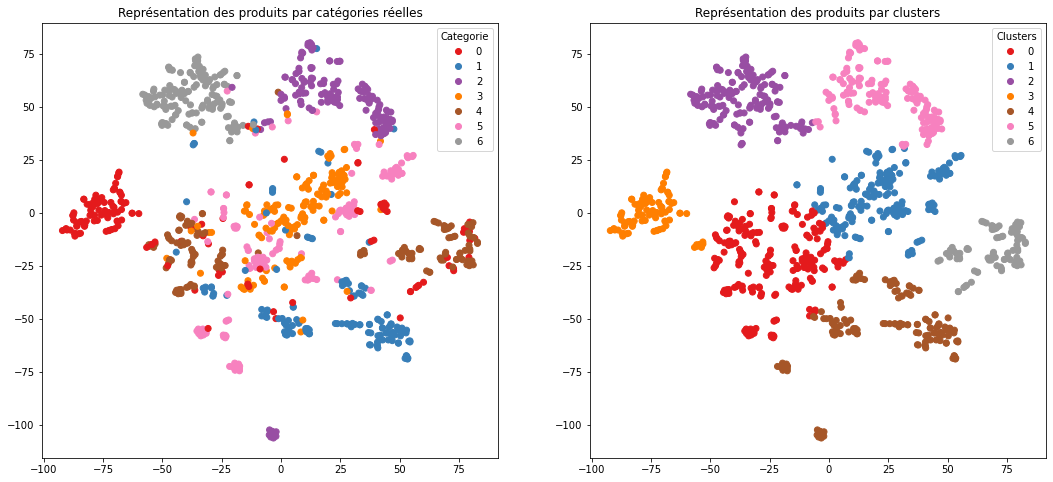

ARI :  0.4808


In [156]:
ARI, X_tsne, labels = ARI_fct(features_bert,10,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [157]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [5 3 6 0 1 2 4]
[[ 90   5   1  17  19  16   2]
 [  0 111   2  13   0  19   5]
 [  0  11 136   0   0   0   3]
 [  0   3   3  97   0  45   2]
 [  4   0   1   7  71  67   0]
 [  0  23   8  46   2  69   2]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.96      0.60      0.74       150
           1       0.73      0.74      0.73       150
           2       0.90      0.91      0.90       150
           3       0.54      0.65      0.59       150
           4       0.77      0.47      0.59       150
           5       0.32      0.46      0.38       150
           6       0.91      1.00      0.96       150

    accuracy                           0.69      1050
   macro avg       0.73      0.69      0.70      1050
weighted avg       0.73      0.69      0.70      1050



### Corpus 2

In [158]:
features_bert2, last_hidden_states_tot2 = feature_BERT_fct(model, model_type, sentences2, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 2s 2s/step
temps traitement :  190.0


Silhouette :  0.50786966
ARI :  0.5075 time :  25.0


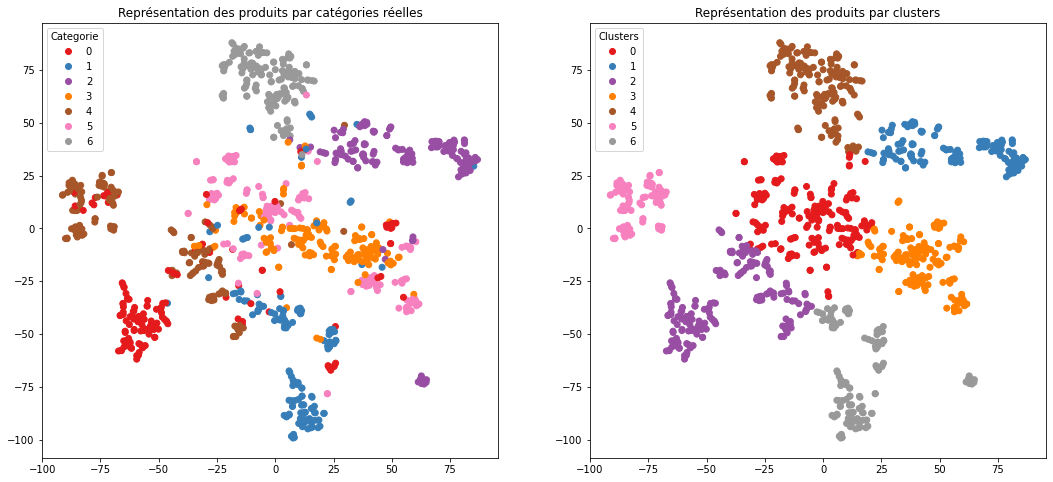

ARI :  0.5075


In [214]:
ARI, X_tsne, labels = ARI_fct(features_bert2,10,'none')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [215]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [5 2 0 3 6 4 1]
[[102   9   0  13  14  10   2]
 [ 18 107   2   4   0  12   7]
 [  0  11 131   5   0   0   3]
 [  2   3   0  76   0  67   2]
 [ 66   0   1   1  74   8   0]
 [  2   2   0  50   0  94   2]
 [  0   0   0   0   0   1 149]]

              precision    recall  f1-score   support

           0       0.54      0.68      0.60       150
           1       0.81      0.71      0.76       150
           2       0.98      0.87      0.92       150
           3       0.51      0.51      0.51       150
           4       0.84      0.49      0.62       150
           5       0.49      0.63      0.55       150
           6       0.90      0.99      0.95       150

    accuracy                           0.70      1050
   macro avg       0.72      0.70      0.70      1050
weighted avg       0.72      0.70      0.70      1050



### Corpus 3 

In [168]:
features_bert3, last_hidden_states_tot3 = feature_BERT_fct(model, model_type, sentences3, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 2s 2s/step
temps traitement :  189.0


Dimensions dataset avant réduction PCA :  (1050, 768)
Dimensions dataset après réduction PCA :  (1050, 371)
Silhouette :  0.49633348
ARI :  0.4369 time :  21.0


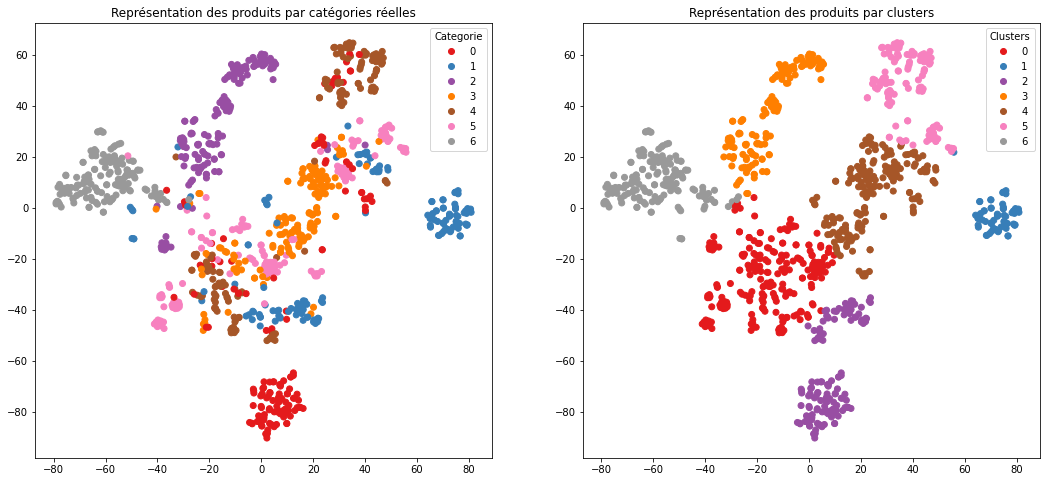

ARI :  0.4369


In [172]:
ARI, X_tsne, labels = ARI_fct(features_bert3,15,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [173]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [5 1 0 2 3 4 6]
[[ 93   0   0  25  12  17   3]
 [ 35  62   1  27   1  17   7]
 [  0   0 132   2   1  13   2]
 [  2   0   2 102   3  40   1]
 [  7   0   1   5  77  60   0]
 [  0   1   0  31  27  90   1]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       150
           1       0.98      0.41      0.58       150
           2       0.97      0.88      0.92       150
           3       0.53      0.68      0.60       150
           4       0.64      0.51      0.57       150
           5       0.38      0.60      0.47       150
           6       0.91      1.00      0.96       150

    accuracy                           0.67      1050
   macro avg       0.73      0.67      0.68      1050
weighted avg       0.73      0.67      0.68      1050



### B -  BERT hub Tensorflow

In [174]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

### Corpus 1 (Meilleur model hub Tensorflow)

In [175]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences1, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  207.0


Silhouette :  0.48381656
ARI :  0.5462 time :  29.0


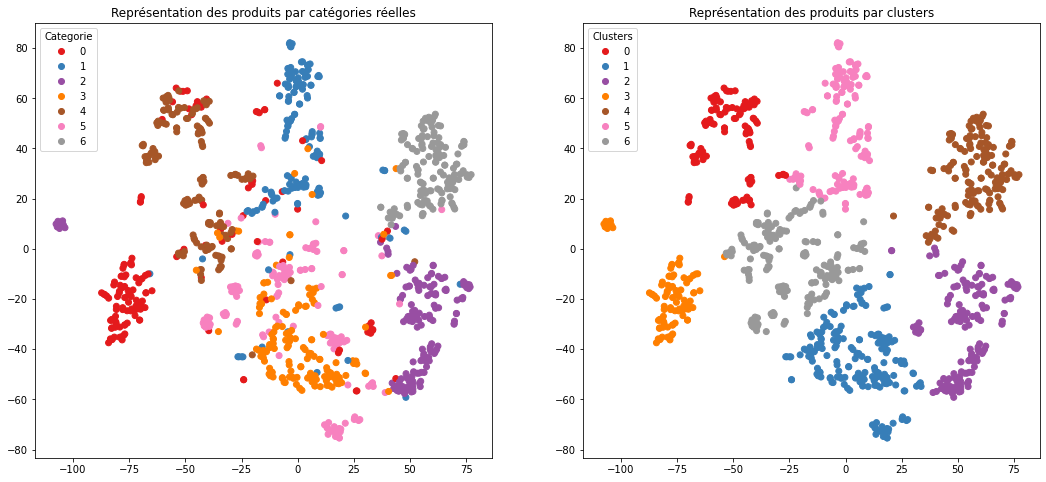

ARI :  0.5462


In [372]:
ARI, X_tsne, labels = ARI_fct(features_bert, 10,'none')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [373]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [4 3 2 0 6 1 5]
[[ 85  13   9   6  19  16   2]
 [  1 115   2  11   0  13   8]
 [ 11   0 137   0   0   0   2]
 [  0   3   4 120   0  21   2]
 [  0   7   1   1  94  47   0]
 [  0   4   5  57   0  82   2]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.88      0.57      0.69       150
           1       0.81      0.77      0.79       150
           2       0.87      0.91      0.89       150
           3       0.62      0.80      0.70       150
           4       0.83      0.63      0.71       150
           5       0.46      0.55      0.50       150
           6       0.90      1.00      0.95       150

    accuracy                           0.75      1050
   macro avg       0.77      0.75      0.75      1050
weighted avg       0.77      0.75      0.75      1050



### Corpus 2

In [182]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert2, last_hidden_states_tot2 = feature_BERT_fct(model, model_type, sentences2, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  200.0


Silhouette :  0.5186001
ARI :  0.491 time :  28.0


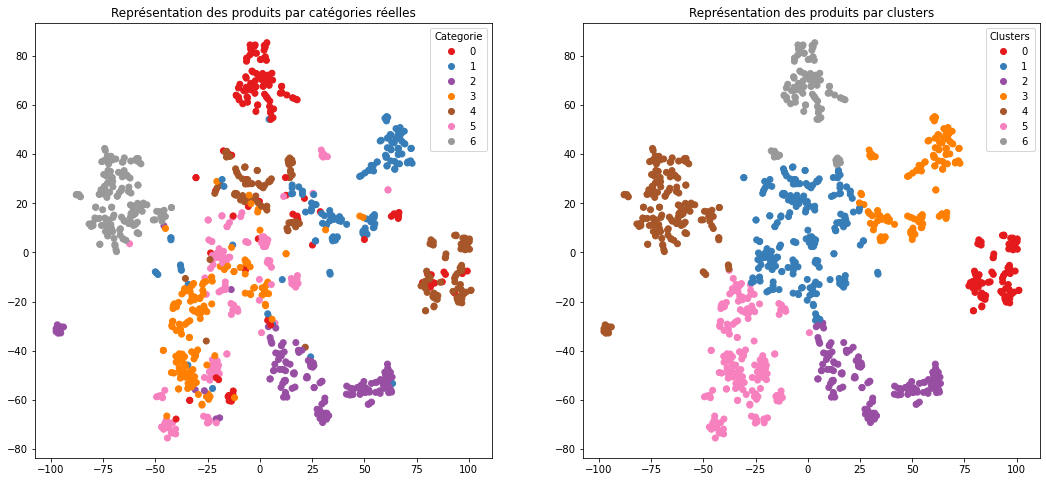

ARI :  0.491


In [380]:
ARI, X_tsne, labels = ARI_fct(features_bert2, 10,'none')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [381]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [4 5 2 1 6 3 0]
[[ 92   9   1  13  14  21   0]
 [  1 111   3   5   0  21   9]
 [  0   0 132   5   0   1  12]
 [  0   3   0 103   0  43   1]
 [ 12   0   1   2  74  61   0]
 [  0  10   1  60   0  78   1]
 [  0   0   0   0   0   1 149]]

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       150
           1       0.83      0.74      0.78       150
           2       0.96      0.88      0.92       150
           3       0.55      0.69      0.61       150
           4       0.84      0.49      0.62       150
           5       0.35      0.52      0.41       150
           6       0.87      0.99      0.93       150

    accuracy                           0.70      1050
   macro avg       0.75      0.70      0.71      1050
weighted avg       0.75      0.70      0.71      1050



### Corpus 3

In [189]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert3, last_hidden_states_tot3 = feature_BERT_fct(model, model_type, sentences3, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  201.0


Silhouette :  0.49408737
ARI :  0.4137 time :  32.0


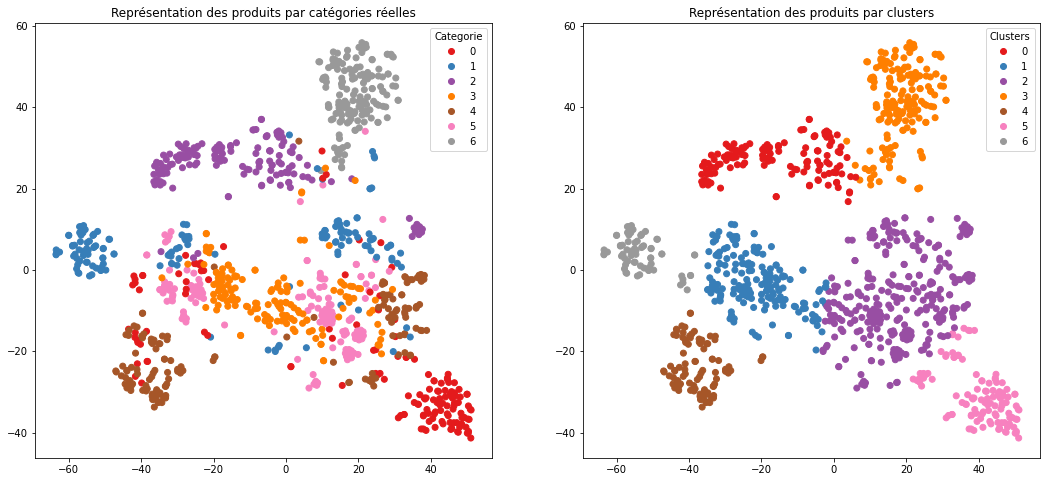

ARI :  0.4137


In [389]:
ARI, X_tsne, labels = ARI_fct(features_bert3, 30,'none')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [390]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [2 3 5 6 4 0 1]
[[ 95   7   0  16  12  17   3]
 [  2  62   1  23   0  54   8]
 [  0   0 131   3   0  12   4]
 [  0   0   2  78   0  68   2]
 [ 18   0   0   1  80  50   1]
 [  0   2   1  50   0  95   2]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.83      0.63      0.72       150
           1       0.87      0.41      0.56       150
           2       0.97      0.87      0.92       150
           3       0.46      0.52      0.49       150
           4       0.87      0.53      0.66       150
           5       0.32      0.63      0.43       150
           6       0.88      1.00      0.94       150

    accuracy                           0.66      1050
   macro avg       0.74      0.66      0.67      1050
weighted avg       0.74      0.66      0.67      1050



## 4 - USE - Universal Sentence Encoder

In [197]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *
import os
os.environ["TF_KERAS"]='1'

In [198]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.9.1
2.9.1
Num GPUs Available:  0
True


In [199]:
import tensorflow_hub as hub

In [203]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [204]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [205]:
batch_size = 10


### Corpus 1

In [206]:
features_USE = feature_USE_fct(sentences1, batch_size)

Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 345)
Silhouette :  0.49123308
ARI :  0.432 time :  23.0


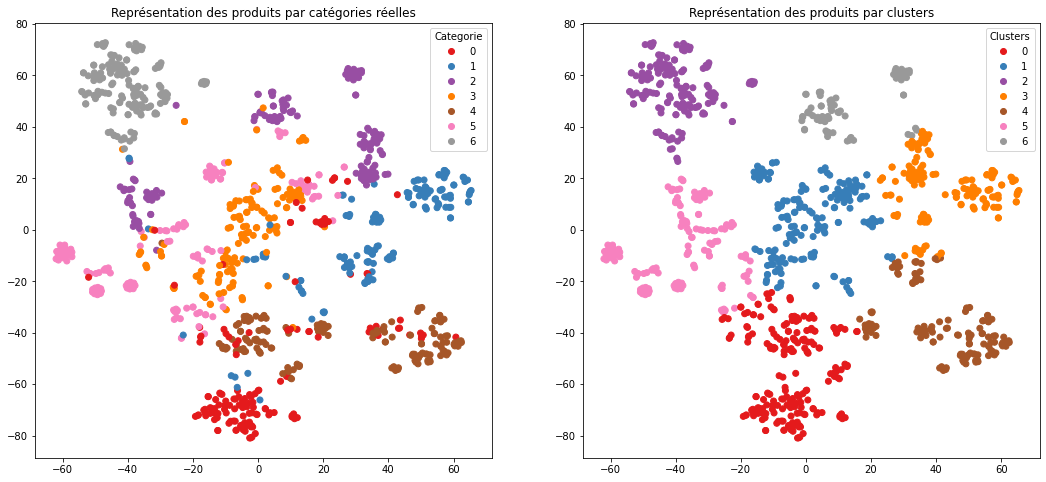

ARI :  0.432


In [211]:
ARI, X_tsne, labels = ARI_fct(features_USE, 15,'pca')

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [212]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [0 3 6 1 4 5 2]
[[107   5   0  15  20   3   0]
 [  6  95   0  19  27   1   2]
 [  0  48  59   0   0  41   2]
 [ 11   0   7 106   0  23   3]
 [ 64   0   0   0  85   1   0]
 [ 16   3   7  42   0  82   0]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.52      0.71      0.60       150
           1       0.63      0.63      0.63       150
           2       0.81      0.39      0.53       150
           3       0.58      0.71      0.64       150
           4       0.64      0.57      0.60       150
           5       0.54      0.55      0.54       150
           6       0.96      1.00      0.98       150

    accuracy                           0.65      1050
   macro avg       0.67      0.65      0.65      1050
weighted avg       0.67      0.65      0.65      1050



### Corpus 2

In [213]:
features_USE2 = feature_USE_fct(sentences2, batch_size)

Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 357)
Silhouette :  0.4632351
ARI :  0.5476 time :  23.0


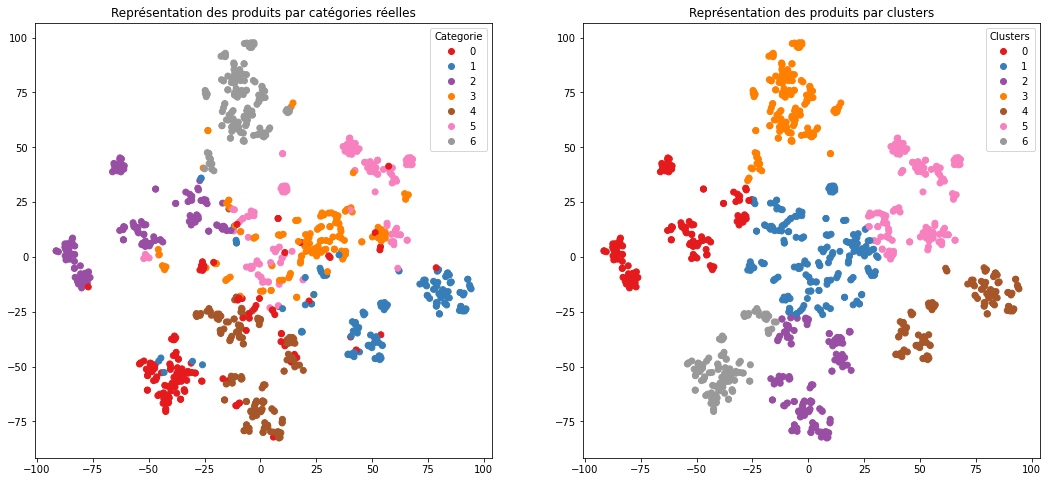

ARI :  0.5476


In [215]:
ARI, X_tsne, labels = ARI_fct(features_USE2, 10,'pca')

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [216]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [2 3 4 6 1 5 0]
[[ 90   5   1  29  21   4   0]
 [  5 122   0  17   3   1   2]
 [  0   0 132  17   0   0   1]
 [  0   0   7  74   0  64   5]
 [ 26   0   0  10 114   0   0]
 [  0   1   7  59   0  81   2]
 [  0   0   0   0   0   0 150]]

              precision    recall  f1-score   support

           0       0.74      0.60      0.66       150
           1       0.95      0.81      0.88       150
           2       0.90      0.88      0.89       150
           3       0.36      0.49      0.42       150
           4       0.83      0.76      0.79       150
           5       0.54      0.54      0.54       150
           6       0.94      1.00      0.97       150

    accuracy                           0.73      1050
   macro avg       0.75      0.73      0.74      1050
weighted avg       0.75      0.73      0.74      1050



### Corpus 3 (meilleur model USE)

In [218]:
features_USE3 = feature_USE_fct(sentences3, batch_size)

Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 361)
Silhouette :  0.48147297
ARI :  0.6425 time :  33.0


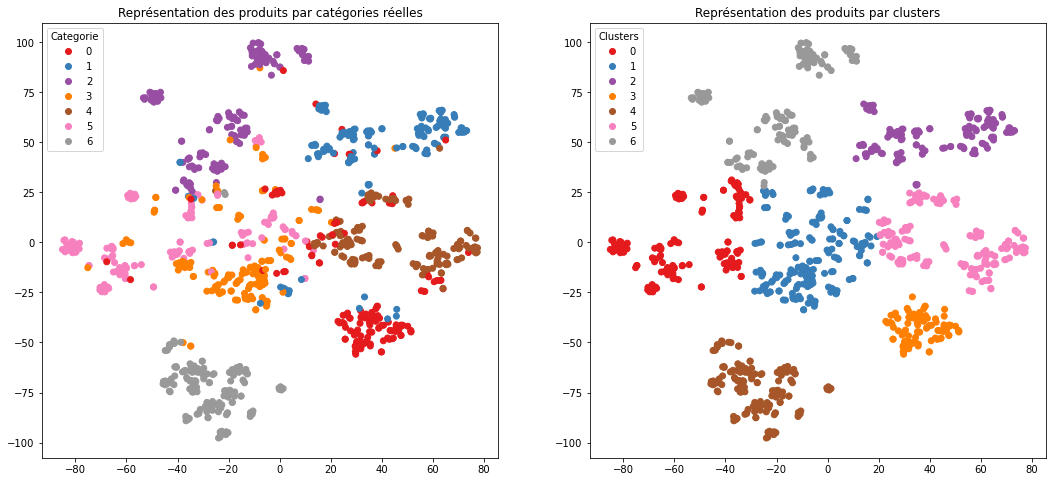

ARI :  0.6425


In [223]:
ARI, X_tsne, labels = ARI_fct(features_USE3, 10,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [224]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [5 3 1 0 6 4 2]
[[ 88   7   1  24  27   3   0]
 [  5 129   2  11   1   2   0]
 [  0   0 136   2   0  12   0]
 [  0   1   9 108   1  28   3]
 [  0   1   0   8 141   0   0]
 [  0   0   7  37   0 106   0]
 [  0   0   0   2   0   0 148]]

              precision    recall  f1-score   support

           0       0.95      0.59      0.72       150
           1       0.93      0.86      0.90       150
           2       0.88      0.91      0.89       150
           3       0.56      0.72      0.63       150
           4       0.83      0.94      0.88       150
           5       0.70      0.71      0.70       150
           6       0.98      0.99      0.98       150

    accuracy                           0.82      1050
   macro avg       0.83      0.82      0.82      1050
weighted avg       0.83      0.82      0.82      1050



In [231]:
USE_dbl=pd.DataFrame(features_USE3)
pickle.dump(USE_dbl, open('USE_dbl', 'wb'))
USE_dbl = pickle.load(open('USE_dbl', 'rb'))

# Conclusion
Pour le reconnaissance de texte les methodes Tf-Idf et USE donne de bons resultats mais pas sur les memes categories. Tf-idf permet une bonne reconnaissance des 3 dernieres categories tandis que USE donne de meilleurs resultats pour les categories 1 et 2. 


# Analyse d'images

## Import des images

In [236]:
from os import listdir
path = "C:/Users/marwa/Desktop/P6/Images/"

list_photos = [file for file in listdir(path)]
print(len(list_photos))
data = pd.read_csv('image_data.csv')

1050


## Création des labels des photos à partir du nom des images

## Afichage d'un echantillon d'images de chaque categorie

Watches 


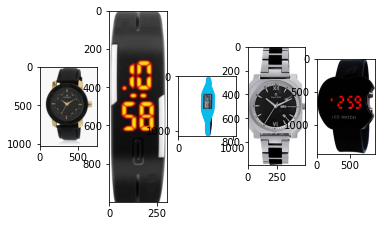

Kitchen & Dining 


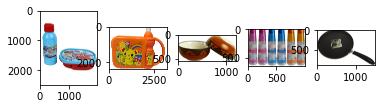

Computers 


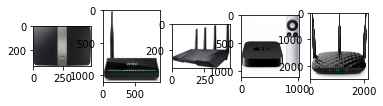

Beauty and Personal Care 


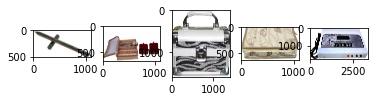

Home Furnishing 


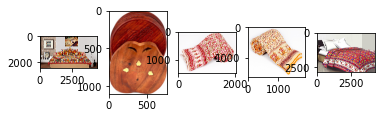

Home Decor & Festive Needs 


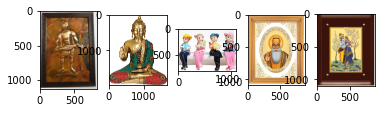

Baby Care 


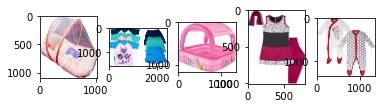

In [250]:
sample_nb=5
list_photos=data['image']
list_labels=set(data['Category'])
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["Category"][i]==name]
    return list_image_name



for name in list_labels :
    print(name)
    # print("-------")
    for i in range(sample_nb):
        plt.subplot(1,sample_nb,0 + 1+ i)
        filename = path + list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

## Regularisation des images

In [270]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
dim=(225,225)
# Charger l'image comme matrice de pixels
image_num=40
image = cv2.imread(path+list_photos[image_num],0)
res = cv2.equalizeHist(image)   # equalize image histogram
cv2.imshow("Equalize histogram",np.hstack((image, res)))
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() 

In [272]:
res = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow("Gaussian Blur",np.hstack((image, res)))
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() 

In [274]:
res = cv2.equalizeHist(image)   # equalize image histogram
res = cv2.GaussianBlur(res,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow("Gaussian Blur after Equalise histogram",np.hstack((image, res)))
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() 

In [275]:
res = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
res = cv2.equalizeHist(res)   # equalize image histogram
cv2.imshow("Gaussian Blur before Equalise histogram",np.hstack((image, res)))
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() 

## Détermination et affichage des descripteurs SIFT


Guaussian Blur limite le nombre de descripteur s'il est utilise seul sans le EqualizeHist. Par contre le nombre de descripteurs augmante si on fait gaussian blur avant le histogram equalizer

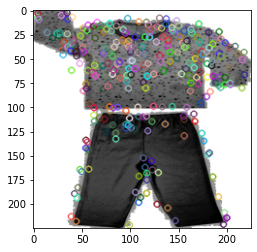

Descripteurs :  (303, 128)

[[  5.   4.   6. ...   0.   0.   0.]
 [  1.   0.   5. ...   0.   0.   0.]
 [ 21.  10.   3. ...   0.   0.   0.]
 ...
 [  6.  23.  30. ...   0.   1.   2.]
 [ 21.  18.  17. ...   0.   0.   0.]
 [  0.   0.  15. ...   0.  10. 138.]]


In [290]:
sift = cv2.SIFT_create()
width = 225
height = 225
dim = (width, height)
image = cv2.imread(path+list_photos[image_num],0) # convert in gray
image = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
image = cv2.equalizeHist(image)   # equalize image histogram
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

## Pré-traitement des images via SIFT
### Créations des descripteurs de chaque image
* Pour chaque image Guassian blur et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [291]:
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) 
    image=cv2.GaussianBlur(image,dim,cv2.BORDER_DEFAULT)
    image = cv2.equalizeHist(image)   # equalize image histogram
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    kp, des = sift.detectAndCompute(image, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (268673, 128)
temps de traitement SIFT descriptor :           432.16 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [292]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  518
Création de 518 clusters de descripteurs ...
temps de traitement kmeans :             7.69 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [294]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_)) #nombre de classes
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           150.04 secondes


In [295]:
im_features.shape

(1050, 518)

In [299]:
ARI, X_tsne, labels = ARI_fct(im_features, 10,'pca')

Dimensions dataset avant réduction PCA :  (1050, 518)
Dimensions dataset après réduction PCA :  (1050, 425)
Silhouette :  0.3564449
ARI :  0.0415 time :  31.0


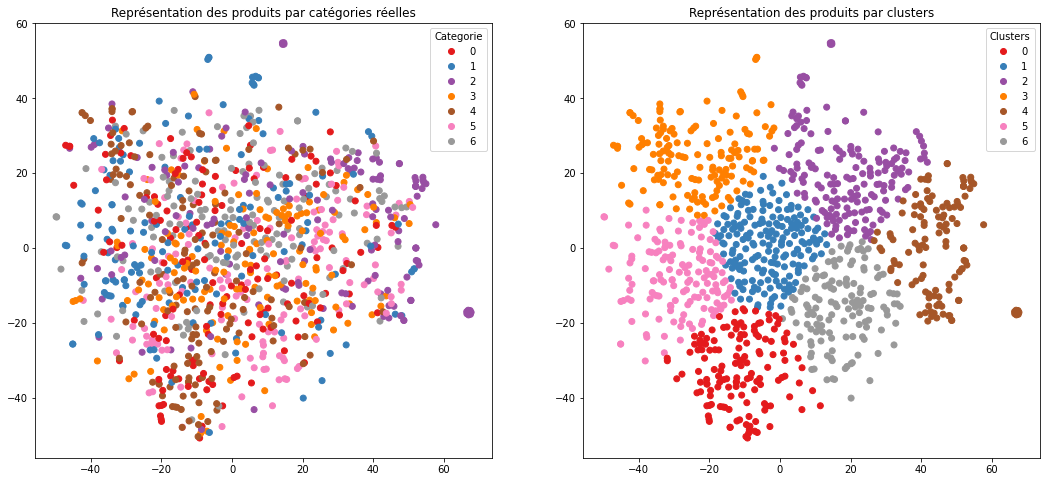

ARI :  0.0415


In [300]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [301]:
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [4 3 6 4 2 1 5]
[[ 0 13 10 29 58 24 16]
 [ 0 48  7 23 37 11 24]
 [ 0 11 56 13 26 12 32]
 [ 0 22 12 38 26 25 27]
 [ 0 15  2 23 85 13 12]
 [ 0 18 21 23 29 36 23]
 [ 0 18 15 35 31 12 39]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.33      0.32      0.33       150
           2       0.46      0.37      0.41       150
           3       0.21      0.25      0.23       150
           4       0.29      0.57      0.38       150
           5       0.27      0.24      0.25       150
           6       0.23      0.26      0.24       150

    accuracy                           0.29      1050
   macro avg       0.25      0.29      0.26      1050
weighted avg       0.25      0.29      0.26      1050



## Conclusion
SIFT ne permet pas une bonne reconnaissance des categories des produits, la repartition des produits est assez aleatoire. Nous allons donc explorer le pretraitement par CNN

## Transfer learning - CNN

In [302]:
import numpy as np
import pandas as pd
from glob import glob
 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
 
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

In [303]:
from tensorflow.keras.utils  import load_img, img_to_array

## Extraction des feature des images pretraitees

### On construit le model CNN sans la couche de classification

In [304]:
model = VGG16(weights="imagenet", input_shape=(224, 224, 3))

new_model = Model(inputs=model.input, outputs=model.layers[-2].output)
new_model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x0000019EE60BD370>>

### Pre-traitment des images avant CNN

In [305]:
data_pred={}
for i in range(len(list_photos)) :
    img = load_img(path+list_photos[i], target_size=(224, 224))  # Charger l'image
    img = img_to_array(img)  # Convertir en tableau numpy
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images 
    img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
    y=new_model.predict(img)
    
    data_pred[list_photos[i]] = y

1/1 [==============================] - 1s 1s/step


In [306]:
features=np.array(list(data_pred.values())) #Conversion an numpy array
features.shape

(1050, 1, 4096)

In [307]:
features=features.reshape(-1, 4096) # flattening
features.shape

(1050, 4096)

In [330]:
cnn_features=pd.DataFrame(features)
cnn_features.shape

(1050, 4096)

In [331]:
pickle.dump(cnn_features, open('cnn_features', 'wb'))
cnn_features=pickle.load(open('cnn_features', 'rb'))

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)
Silhouette :  0.46024776
ARI :  0.5374 time :  49.0


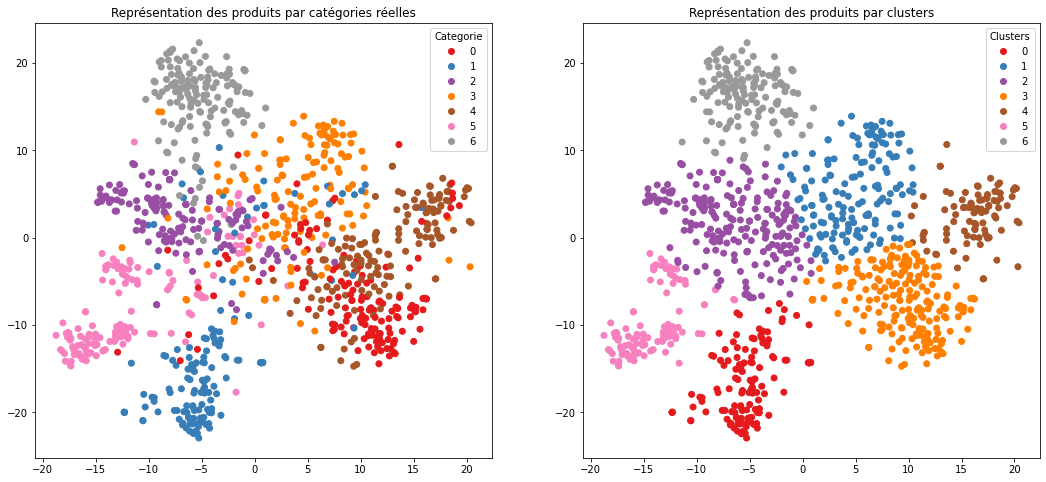

ARI :  0.5374


In [316]:
ARI, X_tsne, labels = ARI_fct(features, 75,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [317]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [1 3 2 0 4 5 6]
[[111   3   7  17  11   1   0]
 [  4 118  13  12   1   1   1]
 [  1   2 134  11   0   2   0]
 [ 12   1  16 111   5   2   3]
 [ 67   0   2   5  76   0   0]
 [  1   6  36   2   0 104   1]
 [  0   0  11   1   0   0 138]]

              precision    recall  f1-score   support

           0       0.57      0.74      0.64       150
           1       0.91      0.79      0.84       150
           2       0.61      0.89      0.73       150
           3       0.70      0.74      0.72       150
           4       0.82      0.51      0.63       150
           5       0.95      0.69      0.80       150
           6       0.97      0.92      0.94       150

    accuracy                           0.75      1050
   macro avg       0.79      0.75      0.76      1050
weighted avg       0.79      0.75      0.76      1050



# Text et image
Le tf-IDF avec stemming a donne les meilleurs resultats pour le traitment du texte et le CNN a donne de meilleurs resultats pour le traitment des images. On va essayer de combiner les 2 pour voir si on a une amelioration des resultats


In [332]:
concat= pd.concat([TfIdf_freq_stem, cnn_features], axis=1)
concat.shape

(1050, 9220)

Dimensions dataset avant réduction PCA :  (1050, 9220)
Dimensions dataset après réduction PCA :  (1050, 803)
Silhouette :  0.45112062
ARI :  0.4915 time :  51.0


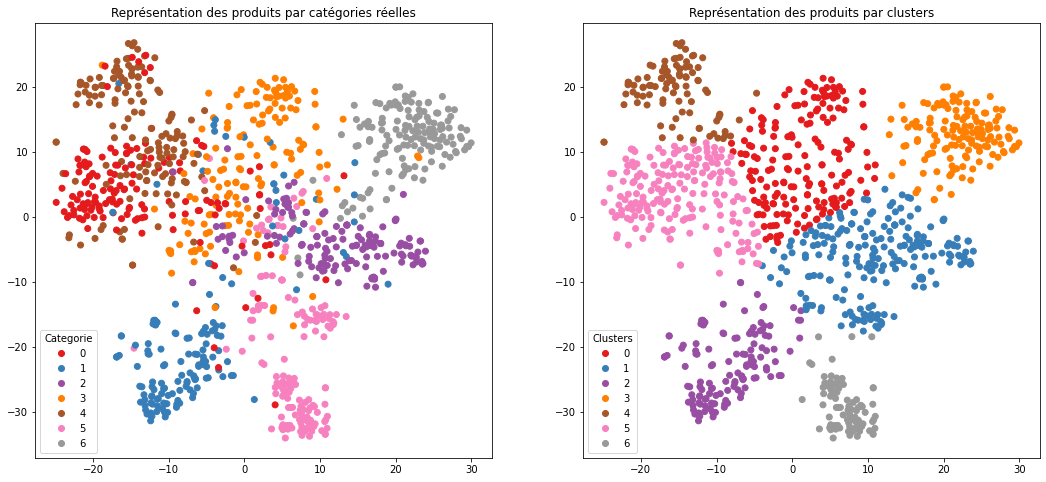

ARI :  0.4915


In [340]:
ARI, X_tsne, labels = ARI_fct(concat, 50,'pca')
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [341]:
conf_mat = metrics.confusion_matrix(y_cat_num, labels)
cls_labels_transform = conf_mat_transform(y_cat_num, labels)
conf_mat = metrics.confusion_matrix(y_cat_num,  cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_cat_num, cls_labels_transform))

Correspondance des clusters :  [3 2 1 6 4 0 5]
[[114   4   7  15   8   1   1]
 [  4 118  12  13   1   1   1]
 [  1   2 123  23   0   0   1]
 [ 23   1  12 109   2   0   3]
 [ 56   0   2   8  84   0   0]
 [  0   7  50  12   0  81   0]
 [  0   0  12   1   0   0 137]]

              precision    recall  f1-score   support

           0       0.58      0.76      0.66       150
           1       0.89      0.79      0.84       150
           2       0.56      0.82      0.67       150
           3       0.60      0.73      0.66       150
           4       0.88      0.56      0.69       150
           5       0.98      0.54      0.70       150
           6       0.96      0.91      0.94       150

    accuracy                           0.73      1050
   macro avg       0.78      0.73      0.73      1050
weighted avg       0.78      0.73      0.73      1050



# Entrainement CNN classification

## Diviser les images en train  et validation  sets

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['image'], data['Category'], test_size=0.2, random_state=42)
import shutil
from pathlib import Path
train_folder = Path('train')
test_folder = Path('test')
train_folder.mkdir(exist_ok=True)
test_folder.mkdir(exist_ok=True)

In [343]:
for c in set(y_train):
    (train_folder / c).mkdir(exist_ok=True)
for c in set(y_test):
    (test_folder / c).mkdir(exist_ok=True)
y_train=y_train.str.strip()
y_test=y_test.str.strip()    

In [344]:
path = "C:/Users/marwa/Desktop/P6/Images/"
train_path='C:/Users/marwa/Desktop/P6/train/'
for idx in X_train.index :
    filename = path +  X_train[idx]
    destination= train_path +  y_train[idx]+'/'
    shutil.copy(filename, destination )
    
test_path='C:/Users/marwa/Desktop/P6/test/'
for idx in X_test.index :
    filename = path +  X_test[idx]
    destination= test_path +  y_test[idx]+'/'
    shutil.copy(filename, destination )

# Entrainement du model et classification avec vgg16

In [345]:
IMSIZE=[224,224]
train_path="C:/Users/marwa/Desktop/P6/train"
test_path="C:/Users/marwa/Desktop/P6/test"
train_image_files = glob(train_path + '/*/*.jp*g')
test_image_files = glob(test_path + '/*/*.jp*g')
 
def create_model():
    vgg = VGG16(input_shape=IMSIZE +[3], weights='imagenet', include_top=False)
 
    # Freeze existing VGG already trained weights
    for layer in vgg.layers:
        layer.trainable = False
     
    # get the VGG output
    out = vgg.output
     
    # Add new dense layer at the end
    x = Flatten()(out)
    x = Dense(7, activation='softmax')(x)
     
    model = Model(inputs=vgg.input, outputs=x)
     
    model.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
     
    model.summary()
     
    return model
 
mymodel = create_model()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [346]:
batch_size = 32
image_gen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

train_generator = image_gen.flow_from_directory(
  train_path,
  target_size=IMSIZE,
  class_mode='categorical',
  batch_size=batch_size,
)
 
test_generator = image_gen.flow_from_directory(
  test_path,
  target_size=IMSIZE,
  shuffle=False,
  batch_size=batch_size,
)
type(train_generator.filenames)

Found 840 images belonging to 7 classes.
Found 210 images belonging to 7 classes.


list

In [347]:
epochs = 10
early_stop = EarlyStopping(monitor='val_loss',patience=2)
history=mymodel.fit(
  train_generator,
  validation_data=test_generator,
  epochs=epochs,
  steps_per_epoch=len(train_image_files)//batch_size,
  validation_steps=len(test_image_files) // batch_size,
  callbacks=[early_stop]
  )


Epoch 1/10
26/26 [==============================] - 462s 18s/step - loss: 0.4082 - accuracy: 0.4740 - val_loss: 0.2148 - val_accuracy: 0.7292
Epoch 2/10
26/26 [==============================] - 397s 15s/step - loss: 0.1750 - accuracy: 0.7797 - val_loss: 0.2046 - val_accuracy: 0.6979
Epoch 3/10
26/26 [==============================] - 366s 14s/step - loss: 0.1353 - accuracy: 0.8428 - val_loss: 0.1809 - val_accuracy: 0.7760
Epoch 4/10
26/26 [==============================] - 360s 14s/step - loss: 0.1026 - accuracy: 0.8960 - val_loss: 0.2102 - val_accuracy: 0.7083
Epoch 5/10
26/26 [==============================] - 374s 14s/step - loss: 0.0879 - accuracy: 0.9295 - val_loss: 0.1711 - val_accuracy: 0.7708
Epoch 6/10
26/26 [==============================] - 363s 14s/step - loss: 0.0683 - accuracy: 0.9517 - val_loss: 0.1783 - val_accuracy: 0.7656
Epoch 7/10
26/26 [==============================] - 427s 17s/step - loss: 0.0690 - accuracy: 0.9431 - val_loss: 0.1946 - val_accuracy: 0.7135


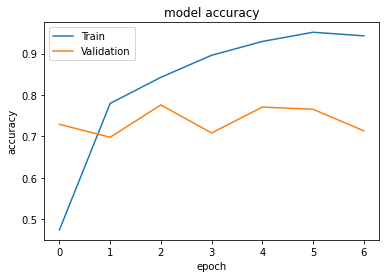

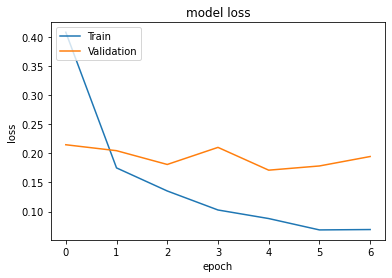

In [348]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()